# **Data Analysis Part 3**

## Objectives

- Construct plots to validate the secondary hypotheses, as laid out in the project ReadMe
- Partially fulfil Business Requirement 1

## Inputs

- outputs/datasets/collection/student-exam-results.csv

## Outputs
- Plots
- Better understanding of how certain categorical variables influence other categorical variables
- Validation of secondary hypotheses

## Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
import seaborn as sns
import pingouin as pg
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(18,5)})
%matplotlib inline

/workspace/.pip-modules/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Change working directory

Since this notebook exists in the jupyter_notebooks directory, we need to change the current working directory from the jupyter_notebooks directory to the workspace, so that any directories created in further codes cells are added in the correct place. 

We access the current directory with the OS packages' `getcwd()` method

In [2]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis/jupyter_notebooks'

We now want to set the working directory as the parent of the current working directory, jupyter_notebooks

- The `os.path.dirname()` method gets the parent directory
- The `os.chir()` method defines the new current directory
- We do this to access all of the project's files and directories, rather than those in the jupyter_notebooks directory

In [3]:
os.chdir(os.path.dirname(current_directory))
print("You set a new current directory")

You set a new current directory


To make certain of things, we now use a code cell to confirm that we have set the current working directory properly

In [4]:
current_directory = os.getcwd()
current_directory

'/workspace/Exam-Scores-Analysis'

# Load Data

In [5]:
df = pd.read_csv('outputs/datasets/collection/student-exam-results.csv')
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,male,group A,high school,standard,completed,67,67,63,65
1,female,group D,some high school,free/reduced,none,40,59,55,51
2,male,group E,some college,free/reduced,none,59,60,50,56
3,male,group B,high school,standard,none,77,78,68,74
4,male,group E,associate's degree,standard,completed,78,73,68,73


## Outline

Now that we have determined the factors that influence the exam scores, we can now begin to validate our secondary hypotheses - those that hypothesize that the categorical variables of the dataset are not independent, and that relationships do exist within them.

These higher-level hypotheses are:

- that increased levels of parental education correlate with increased participation in the test preparation program
- that increased levels of parental education negatively correlate to their children's participation in the free/reduced school lunch program
- that a student's ethnicity has an effect on their parent's educational level
- that a student's ethnicity has an effect on their participation in the free/reduced school lunch program
- that a student's ethnicity has an effect on their participation in the test preparation course
- that a student's gender has an effect on their participation in the test preparation course

We will initially investigate these relationships using the `corr()` method. Before we can do this, we need to undertake some preparations.

# Preparation

First, we instantiate a copy of the dataframe, which we will keep for later use. The original dataframe will be converted into numerical values.

To use the `corr()` method, we need to encode our categorical variable columns with numerical values. We can do this with the `replace()` method and Python dictionaries.
We can define dictionaries with integer values, which we will use to replace the categorical values of the dataframe.

In [6]:
gender_dictionary = {
    'male': 1,
    'female': 2
}

ethnicity_dictionary = {
    'group A': 1,
    'group B': 2,
    'group C': 3,
    'group D': 4,
    'group E': 5
}

parental_education_dictionary = {
    'some high school': 1,
    'high school': 2,
    'some college': 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

lunch_program_dictionary = {
    'standard': 1,
    'free/reduced': 2
}

test_prep_course_dictionary = {
    'completed': 1,
    'none': 2
}

Now we can replace the categorical values:

In [7]:
df['gender'].replace(to_replace=gender_dictionary, inplace=True)
df['ethnicity'].replace(to_replace=ethnicity_dictionary, inplace=True)
df['parental_education'].replace(to_replace=parental_education_dictionary, inplace=True)
df['lunch_program'].replace(to_replace=lunch_program_dictionary, inplace=True)
df['test_preparation_course'].replace(to_replace=test_prep_course_dictionary, inplace=True)
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course,math_score,reading_score,writing_score,average_score
0,1,1,2,1,1,67,67,63,65
1,2,4,1,2,2,40,59,55,51
2,1,5,3,2,2,59,60,50,56
3,1,2,2,1,2,77,78,68,74
4,1,5,4,1,1,78,73,68,73


To simplify matters, and because we are only considering the (formerly) categorical variables, we can safely drop the student test scores:

In [8]:
df.drop(labels=['math_score', 'reading_score', 'writing_score', 'average_score'], axis=1, inplace=True)
df.head()

,gender,ethnicity,parental_education,lunch_program,test_preparation_course
0,1,1,2,1,1
1,2,4,1,2,2
2,1,5,3,2,2
3,1,2,2,1,2
4,1,5,4,1,1


We can now generate a correlation table, and then visualise it with a heatmap:

In [9]:
df_corr = df.corr(method='pearson')
df_corr

,gender,ethnicity,parental_education,lunch_program,test_preparation_course
gender,1.000000,-0.063231,-0.016830,-0.033962,0.007653
ethnicity,-0.063231,1.000000,-0.057522,0.033335,0.029828
parental_education,-0.016830,-0.057522,1.000000,-0.016037,-0.013075
lunch_program,-0.033962,0.033335,-0.016037,1.000000,0.029267
test_preparation_course,0.007653,0.029828,-0.013075,0.029267,1.000000


/tmp/ipykernel_3048/3301145942.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


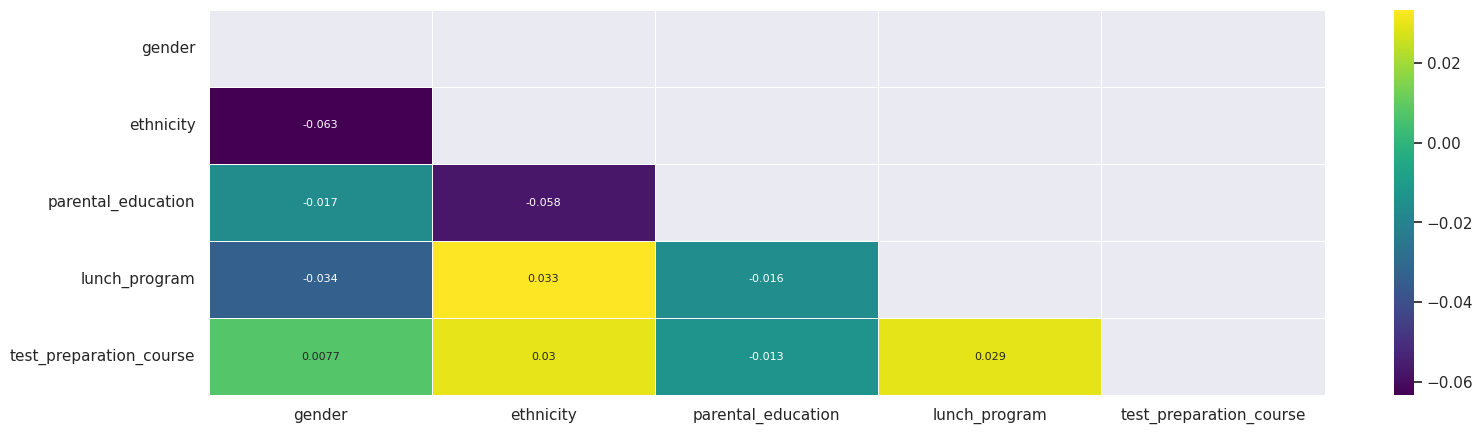

In [10]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr, annot=True, mask=mask, cmap='viridis', annot_kws={"size": 8}, linewidths=0.5)
plt.ylim(df_corr.shape[1],0)
plt.show()

It seems that the correlation method has failed to reveal any significant relationships - we see that the correlation table and the heatmap shows very weak correlations. This may mean that the categorical variables are truly independent, and that none of them has any meaningful influence on the others. However, we should investigate further before we can say this for sure. It may just be that the correlation analysis cannot extract meaningful relationships from numerical values over a small range.

My alternative approach here will be to examine each hypothesized relationship individually, in hopes that a more targeted study will reveal insights.

First, we need to do some housekeeping. We will be constructing plots with encoded dataframes, which will make them less interpretable. Therefore, we will need to construct custom legends. The code cell below sets this up:

In [11]:
labels = ['some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree']

colours = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

sns.set_palette(sns.color_palette(colours))

custom_lines = [
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='purple', lw=4),
                Line2D([0], [0], color='brown', lw=4),
                ]

## Parental education - test preparation course

We will now validate the hypothesis that increased parental education correlates with increased student participation in the test preparation course. To do this, we will cut down the encoded dataframe to just the `parental_education` and `test_preparation_course` columns

- `df_pe_tpc` stands for `dataframe parental education test preparation course`

In [12]:
df_pe_tpc = df.filter(['parental_education', 'test_preparation_course'])
df_pe_tpc.head()

,parental_education,test_preparation_course
0,2,1
1,1,2
2,3,2
3,2,2
4,4,1


Now we can begin to identify relationships. We want to see how many counts of each `parental_education` category there are for each of the 2 values of `test_preparation_course`. To do this, we can use the `query()` method to produce 2 dataframes, one for each value of `test_preparation_course`.

- `df_pe_tpc_comp` is short for `dataframe parental education test preparation course completed`

- `df_pe_tpc_not` is short for `dataframe parental education test preparation course not completed`

In [13]:
df_pe_tpc_comp = df_pe_tpc.query('test_preparation_course == 1')
df_pe_tpc_comp.head()
# test_preparation_course of 1 means students who have completed the course

,parental_education,test_preparation_course
0,2,1
4,4,1
7,3,1
10,3,1
11,2,1


In [14]:
df_pe_tpc_not = df_pe_tpc.query('test_preparation_course == 2')
df_pe_tpc_not.head()
# test_preparation_course of 2 means students who have NOT completed the course

,parental_education,test_preparation_course
1,1,2
2,3,2
3,2,2
5,2,2
6,5,2


We can now use the `value_counts()` method to return the number of unique values of `parental_education`

- `series_pe_tpc_comp_vc` is short for `series parental education test preparation course completed value counts`

- `series_pe_tpc_not_vc` is short for `series parental education test preparation course not completed value counts`

In [15]:
series_pe_tpc_comp_vc = df_pe_tpc_comp['parental_education'].value_counts()
series_pe_tpc_comp_vc

# test preparation course completed

3    82
4    75
1    63
2    57
5    39
6    19
Name: parental_education, dtype: int64

In [16]:
series_pe_tpc_not_vc = df_pe_tpc_not['parental_education'].value_counts()
series_pe_tpc_not_vc
# test preparation course NOT completed

2    145
3    140
1    128
4    128
5     73
6     51
Name: parental_education, dtype: int64

We can now construct barplots to visualise this information.

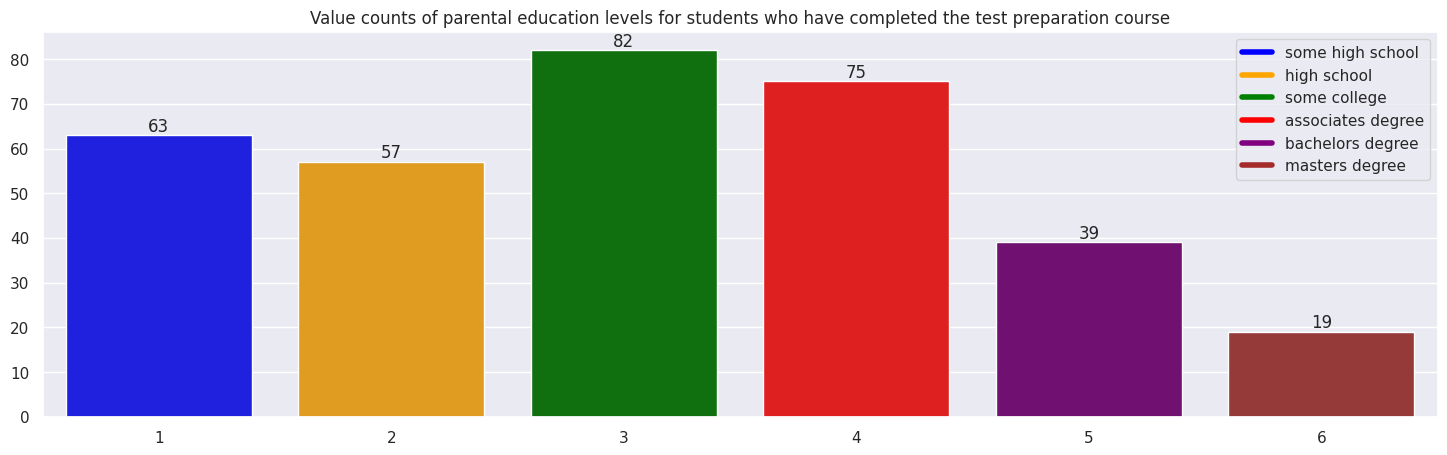

In [17]:
fig_pe_tpc_comp = sns.barplot(x=series_pe_tpc_comp_vc.index, y=series_pe_tpc_comp_vc.values)
plt.bar_label(fig_pe_tpc_comp.containers[0])
plt.title('Value counts of parental education levels for students who have completed the test preparation course')
plt.legend(custom_lines, labels)
plt.show()

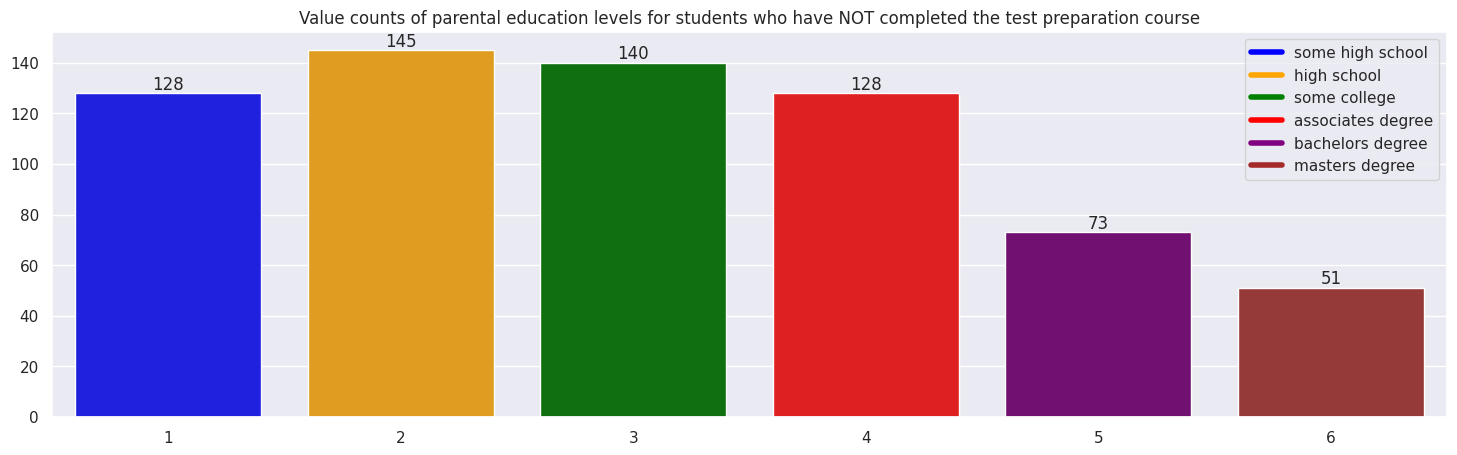

In [18]:
fig_pe_tpc_not = sns.barplot(x=series_pe_tpc_not_vc.index, y=series_pe_tpc_not_vc.values)
plt.bar_label(fig_pe_tpc_not.containers[0])
plt.title('Value counts of parental education levels for students who have NOT completed the test preparation course')
plt.legend(custom_lines, labels)
plt.show()

These 2 Series are not overly useful - If we return to the notebook 02-data-analysis-1, and examine the Pandas Profile Report, we remind ourselves that the test_preparation_course column contains approximately twice as many entries for `none` as for `completed` - 665 vs 335. Therefore, we should expect `df_pe_tpc_none` to contain more value counts for each category of the `parental_education` column. To solve this, we can normalize the value counts. To make the 2 series such that they can be interpreted easily, we will sort them by the `parental_education` column's values, using those values as an index.

The barplots are somewhat more useful, however we have the same problem as with the un-normalised output of the `value_counts()` method - we cannot compare the 2 plots in relative terms. 

After some research, I found [this StackOverflow question](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group). It appears that Seaborn has no native ability to generate countplots that use normalised counts on the y-axis. 

Therefore, we need to use the normalised value counts, as these can be compared in relative terms.

In the code cells below, I prefix the variable names with `series` to indicate that they are Pandas series.

- `series_pe_tpc_comp_nvc` is short for `series parental education test preparation course completed normalised value counts`

- `series_pe_tpc_not_nvc` is short for `series parental education test preparation course not completed normalised value counts`

In [19]:
series_pe_tpc_comp_nvc = df_pe_tpc_comp['parental_education'].value_counts(normalize=True).sort_index()
series_pe_tpc_comp_nvc
# test preparation course completed

1    0.188060
2    0.170149
3    0.244776
4    0.223881
5    0.116418
6    0.056716
Name: parental_education, dtype: float64

In [20]:
series_pe_tpc_not_nvc = df_pe_tpc_not['parental_education'].value_counts(normalize=True).sort_index()
series_pe_tpc_not_nvc
# test preparation course NOT completed

1    0.192481
2    0.218045
3    0.210526
4    0.192481
5    0.109774
6    0.076692
Name: parental_education, dtype: float64

Excellent - even without additional data manipulation, we can compare the series containing the normalised value counts. However, to aid visual presentation, we can construct some plots. To do this, I will create dataframes with 3 columns. 1 column will contain the un-encoded parental education categories, the second will contain the normalised value counts of those categories from the `series_pe_tpc_comp` and `series_pe_tpc_not`, and the third column will contain those same values multipled by 100 and rounded to 1 decimal place, creating a clearer percentage column that is easier to understand. Barplots can then be created using the exact value counts of each category.

Since we are creating new dataframes with string values, the code cell above for generating custom legends is no longer necessary

- `df_pe_tpc_comp_vc` is short for `dataframe parental education test preparation course completed value counts`

- `df_pe_tpc_not_vc` is short for `dataframe parental education test preparation course not completed value counts`

In [21]:
df_pe_tpc_comp_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_tpc_comp_nvc,
    'percentage': (series_pe_tpc_comp_nvc * 100).round(1)
})

df_pe_tpc_comp_vc

,parental_education,normalised value counts,percentage
1,some high school,0.188060,18.8
2,high school,0.170149,17.0
3,some college,0.244776,24.5
4,associates degree,0.223881,22.4
5,bachelors degree,0.116418,11.6
6,masters degree,0.056716,5.7


In [22]:
df_pe_tpc_not_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_tpc_not_nvc,
    'percentage': (series_pe_tpc_not_nvc * 100).round(1)
})

df_pe_tpc_not_vc

,parental_education,normalised value counts,percentage
1,some high school,0.192481,19.2
2,high school,0.218045,21.8
3,some college,0.210526,21.1
4,associates degree,0.192481,19.2
5,bachelors degree,0.109774,11.0
6,masters degree,0.076692,7.7


Now that the dataframes are constructed, we can use them to construct barplots - the x-axis will be the level of parental education and the y-axis will be the rounded percentages

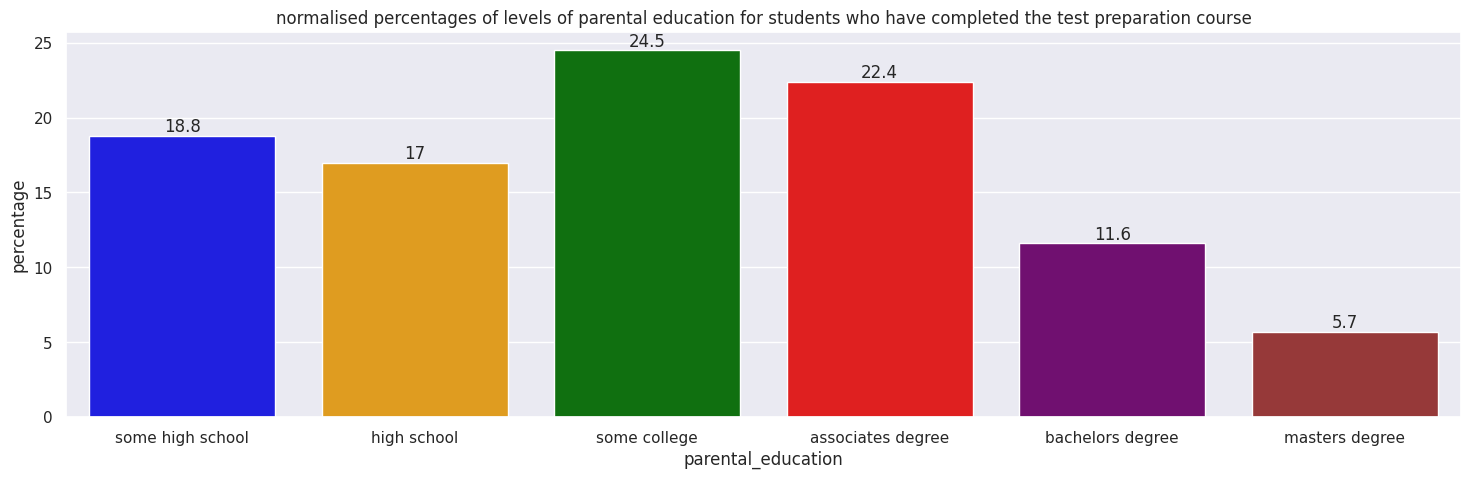

In [23]:
fig_pe_tpc_comp_percent = sns.barplot(x = df_pe_tpc_comp_vc['parental_education'], y = df_pe_tpc_comp_vc['percentage'])
plt.bar_label(fig_pe_tpc_comp_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who have completed the test preparation course')
plt.show()

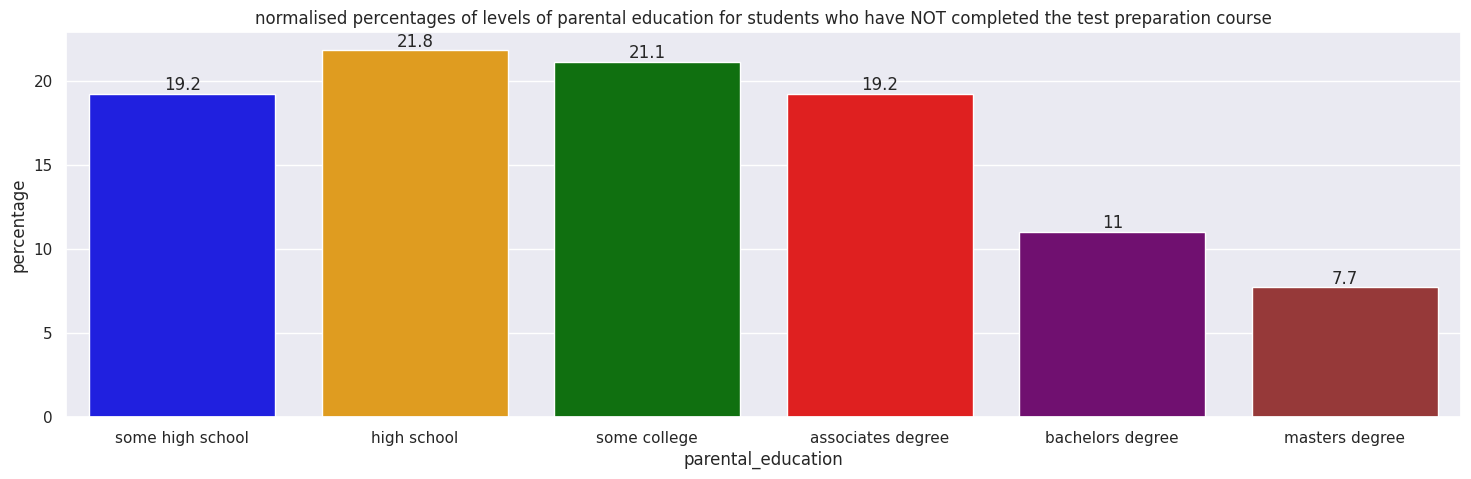

In [24]:
fig_pe_tpc_not_percent = sns.barplot(x = df_pe_tpc_not_vc['parental_education'], y = df_pe_tpc_not_vc['percentage'])
plt.bar_label(fig_pe_tpc_not_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who have NOT completed the test preparation course')
plt.show()

These two plots show that parental education does indeed have an influence on student participation in the test preparation course, though not as much as I would have expected. At the very highest levels of parental education - bachelor's degrees and master's degrees - there is no appreciable difference in student participation in the test preparation course. However, at the lower levels of parental education, there is a definite bias toward their children not participating in the test preparation course. If we examine the first plot, where students have completed the test preparation course, there are large and noticeable jump in percentages of parents who have at least some college education.

As an added bonus, these plots are also visually appealing and informative. Since the barplots do not use bins, the bars of the plot are evenly spaced, leading to a more positive user experience. The use of rounded percentage values is also, I think, superior to the use of the normalised value counts. The percentages are numbers of a larger magnitude, and hence easier to understand, without noticeably affecting accuracy.

We can validate this hypothesis as true but slight - there is a correlative link, but it is small.

## Parental education - school lunch program

We can now validate the hypothesis that increased levels of parental education negatively correlate with student participation in the free/reduced school lunch program. Or, put another way - increased levels of parental education postively correlate with student participation in the standard school lunch program.

Now that we have narrowed down the method by which we can establish relationships, we can validate these hypotheses quicker. First, we must filter the encoded dataframe down to the columns that we require. `df_pe_lp` is short for `dataframe parental education lunch program`

In [25]:
df_pe_lp = df.filter(['parental_education', 'lunch_program'])
df_pe_lp.head()

,parental_education,lunch_program
0,2,1
1,1,2
2,3,2
3,2,1
4,4,1


Now we can generate 2 dataframes - one for students who are on the standard lunch program, and another for students who are on the free/reduced lunch program.

- `df_pe_lp_std` is short for `dataframe parental education lunch program standard`

- `df_pe_lp_fr` is short for `dataframe parental education lunch program free/reduced`

In [26]:
df_pe_lp_std = df_pe_lp.query('lunch_program == 1')
df_pe_lp_std.head()
# standard lunch program

,parental_education,lunch_program
0,2,1
3,2,1
4,4,1
5,2,1
6,5,1


In [27]:
df_pe_lp_fr = df_pe_lp.query('lunch_program == 2')
df_pe_lp_fr.head()
# free/reduced lunch program

,parental_education,lunch_program
1,1,2
2,3,2
9,3,2
15,4,2
18,4,2


Now we can generate the normalised value counts. As above, the variables are prefixed with `series` to indicate that they are Pandas series, rather than dataframes

- `series_pe_lp_std` is short for `dataframe parental education lunch program standard`

- `series_pe_lp_fr` is short for `dataframe parental education lunch program free/reduced`

In [28]:
series_pe_lp_std = df_pe_lp_std['parental_education'].value_counts(normalize=True).sort_index()
series_pe_lp_std
# standard lunch program

1    0.190184
2    0.208589
3    0.205521
4    0.202454
5    0.122699
6    0.070552
Name: parental_education, dtype: float64

In [29]:
series_pe_lp_fr = df_pe_lp_fr['parental_education'].value_counts(normalize=True).sort_index()
series_pe_lp_fr
# free/reduced lunch program

1    0.192529
2    0.189655
3    0.252874
4    0.204023
5    0.091954
6    0.068966
Name: parental_education, dtype: float64

We can generate the dataframes which we will use to construct the barplots

- `df_pe_lp_std_vc` is short for `dataframe parental education lunch standard program standard value counts`

- `df_pe_lp_fr_vc` is short for `dataframe parental education lunch program free/reduced value counts`

In [30]:
df_pe_lp_std_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_lp_std,
    'percentage': (series_pe_lp_std * 100).round(1)
})

df_pe_lp_std_vc

,parental_education,normalised value counts,percentage
1,some high school,0.190184,19.0
2,high school,0.208589,20.9
3,some college,0.205521,20.6
4,associates degree,0.202454,20.2
5,bachelors degree,0.122699,12.3
6,masters degree,0.070552,7.1


In [31]:
df_pe_lp_fr_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_lp_fr,
    'percentage': (series_pe_lp_fr * 100).round(1)
})

df_pe_lp_fr_vc

,parental_education,normalised value counts,percentage
1,some high school,0.192529,19.3
2,high school,0.189655,19.0
3,some college,0.252874,25.3
4,associates degree,0.204023,20.4
5,bachelors degree,0.091954,9.2
6,masters degree,0.068966,6.9


We may now construct the barplots.

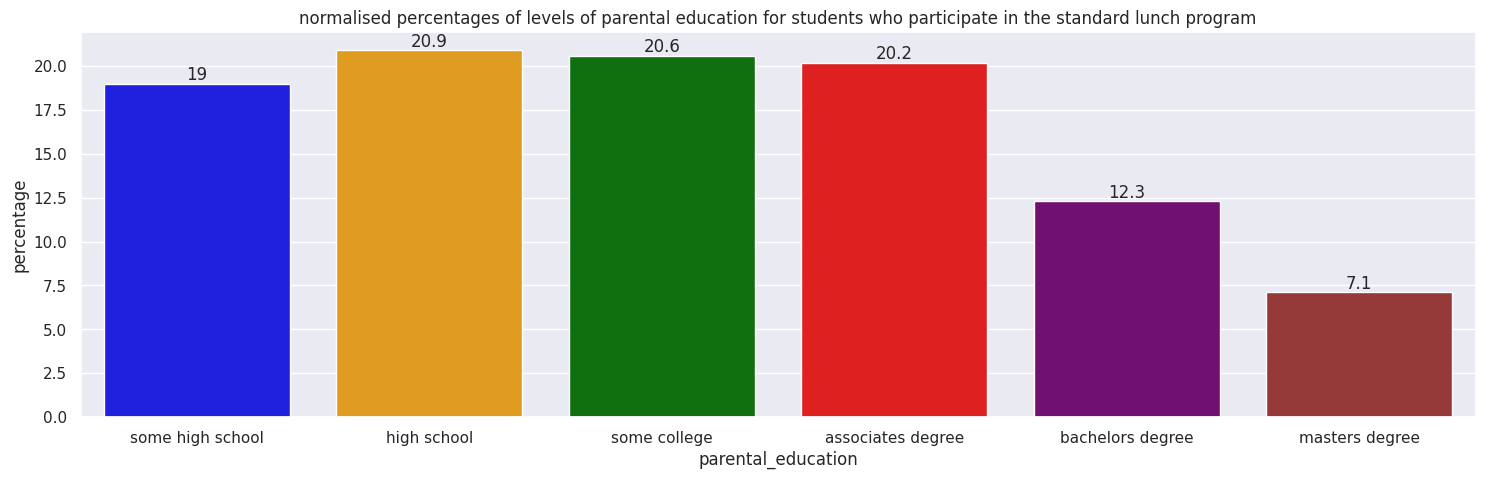

In [32]:
fig_pe_lp_std_percent = sns.barplot(x = df_pe_lp_std_vc['parental_education'], y = df_pe_lp_std_vc['percentage'])
plt.bar_label(fig_pe_lp_std_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who participate in the standard lunch program')
plt.show()

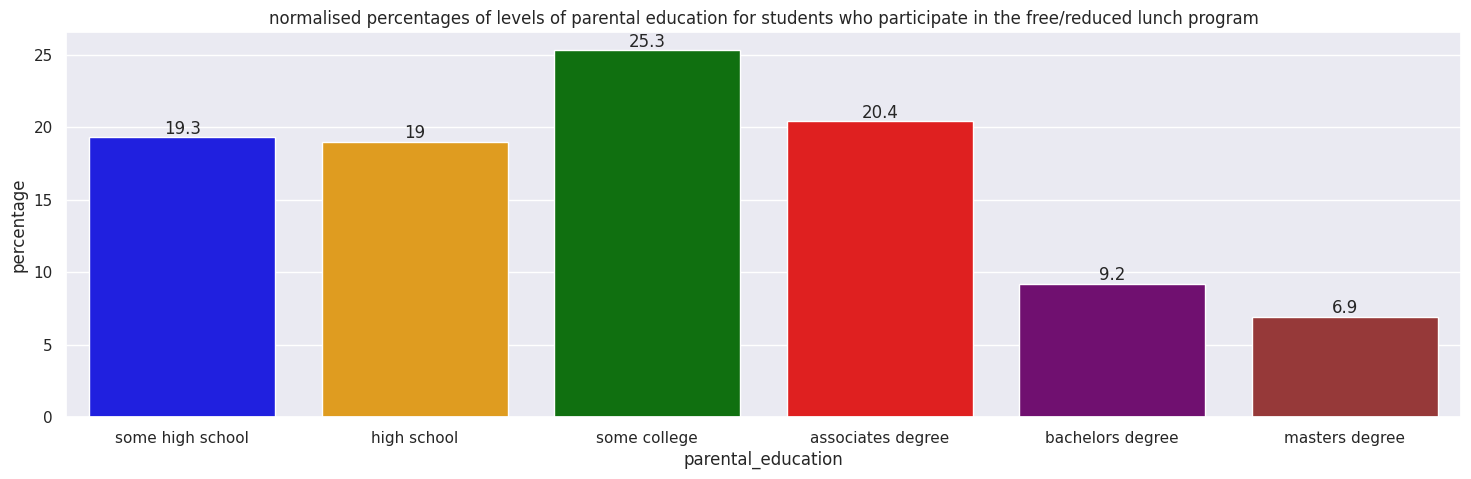

In [33]:
fig_pe_lp_fr_percent = sns.barplot(x = df_pe_lp_fr_vc['parental_education'], y = df_pe_lp_fr_vc['percentage'])
plt.bar_label(fig_pe_lp_fr_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who participate in the free/reduced lunch program')
plt.show()

These plots and the normalised value counts show that parental education level appears to only slightly influence student participation in the school lunch program:

- Parents who have master's degrees see their students participate in both lunch programs at roughly the same rate - about 7%
- Parents who have bachelor's degrees see their students participate in standard lunch program at a slightly higher rate - about 12% versus 9%
- Parents who have some high school education, have completed high school or who have associates degrees participate in both lunch programs at roughly the same rate, about 20% for each level of education
- The only level of parental education where there is a noticeable difference in lunch program participation rates is for those parents who have only some college education. Students with these parents participate in the free/reduced lunch program at a rate of 25% vs 20% for the standard program.

Our hypothesis can now be validated, but we have hypothesised somewhat incorrectly. The hypothesis states that parental education influences the lunch program that students participate in. However, we have shown that parental education only slightly influences the lunch program that a student participates in. This hypothesis can be validated as true but slight.

## Parental education - Ethnicity

We can now begin to validate the hypothesis that a student's ethnicity and their parent's level of education are linked. 

As before, now that we have narrowed down the method by which we can establish relationships, we can do so quicker. However, the previous 2 analyses had 1 categorical variable possessing ony 2 categories. In this analysis, both `ethnicity` and `parental_education` have multiple categories. To simplify matters slightly, we shall use `ethnicity` as the variable which we will generate the normalised value counts for `parental_education` against. This will allow us to generate 5 plots rather than 6.

First, we must filter the encoded dataframe down to the `ethnicity` and `parental_education` columns.

- `df_pe_eth` is short for `dataframe parental education ethnicity`

In [34]:
df_pe_eth = df.filter(['ethnicity', 'parental_education'])
df_pe_eth.head()

,ethnicity,parental_education
0,1,2
1,4,1
2,5,3
3,2,2
4,5,4


Now we can query for each ethnicity

- `df_pe_eth_a` is short for `dataframe parental education ethnicity A`

- `df_pe_eth_b` is short for `dataframe parental education ethnicity B`

- `df_pe_eth_c` is short for `dataframe parental education ethnicity C`

- `df_pe_eth_d` is short for `dataframe parental education ethnicity D`

- `df_pe_eth_e` is short for `dataframe parental education ethnicity E`

In [35]:
df_pe_eth_a = df_pe_eth.query('ethnicity == 1')
df_pe_eth_a.head()
# ethnicity A

,ethnicity,parental_education
0,1,2
6,1,5
29,1,1
31,1,5
32,1,1


In [36]:
df_pe_eth_b = df_pe_eth.query('ethnicity == 2')
df_pe_eth_b.head()
# ethnicity B

,ethnicity,parental_education
3,2,2
16,2,2
22,2,3
23,2,3
28,2,2


In [37]:
df_pe_eth_c = df_pe_eth.query('ethnicity == 3')
df_pe_eth_c.head()
# ethnicity C

,ethnicity,parental_education
9,3,3
13,3,2
17,3,4
18,3,4
19,3,3


In [38]:
df_pe_eth_d = df_pe_eth.query('ethnicity == 4')
df_pe_eth_d.head()
# ethnicity D

,ethnicity,parental_education
1,4,1
5,4,2
8,4,2
11,4,2
12,4,4


In [39]:
df_pe_eth_e = df_pe_eth.query('ethnicity == 5')
df_pe_eth_e.head()
# ethnicity E

,ethnicity,parental_education
2,5,3
4,5,4
7,5,3
10,5,3
14,5,1


Now we can generate normalised value counts

- `series_pe_eth_a` is short for `series parental education ethnicity A`

- `series_pe_eth_b` is short for `series parental education ethnicity B`

- `series_pe_eth_c` is short for `series parental education ethnicity C`

- `series_pe_eth_d` is short for `series parental education ethnicity D`

- `series_pe_eth_e` is short for `series parental education ethnicity E`

In [40]:
series_pe_eth_a = df_pe_eth_a['parental_education'].value_counts(normalize=True).sort_index()
series_pe_eth_a
# ethnicity A

1    0.139241
2    0.189873
3    0.253165
4    0.139241
5    0.177215
6    0.101266
Name: parental_education, dtype: float64

In [41]:
series_pe_eth_b = df_pe_eth_b['parental_education'].value_counts(normalize=True).sort_index()
series_pe_eth_b
# ethnicity B

1    0.185366
2    0.190244
3    0.239024
4    0.195122
5    0.097561
6    0.092683
Name: parental_education, dtype: float64

In [42]:
series_pe_eth_c = df_pe_eth_c['parental_education'].value_counts(normalize=True).sort_index()
series_pe_eth_c
# ethnicity C

1    0.204334
2    0.179567
3    0.213622
4    0.232198
5    0.108359
6    0.061920
Name: parental_education, dtype: float64

In [43]:
series_pe_eth_d = df_pe_eth_d['parental_education'].value_counts(normalize=True).sort_index()
series_pe_eth_d
# ethnicity D

1    0.194656
2    0.225191
3    0.217557
4    0.190840
5    0.110687
6    0.061069
Name: parental_education, dtype: float64

In [44]:
series_pe_eth_e = df_pe_eth_e['parental_education'].value_counts(normalize=True).sort_index()
series_pe_eth_e
# ethnicity E

1    0.190840
2    0.236641
3    0.206107
4    0.206107
5    0.106870
6    0.053435
Name: parental_education, dtype: float64

We can now construct the dataframes

- `df_pe_eth_a_vc` is short for `dataframe parental education ethnicity A value counts`

- `df_pe_eth_b_vc` is short for `dataframe parental education ethnicity B value counts`

- `df_pe_eth_c_vc` is short for `dataframe parental education ethnicity C value counts`

- `df_pe_eth_d_vc` is short for `dataframe parental education ethnicity D value counts`

- `df_pe_eth_e_vc` is short for `dataframe parental education ethnicity E value counts`

In [45]:
df_pe_eth_a_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_eth_a,
    'percentage': (series_pe_eth_a * 100).round(1)
})

df_pe_eth_a_vc

,parental_education,normalised value counts,percentage
1,some high school,0.139241,13.9
2,high school,0.189873,19.0
3,some college,0.253165,25.3
4,associates degree,0.139241,13.9
5,bachelors degree,0.177215,17.7
6,masters degree,0.101266,10.1


In [46]:
df_pe_eth_b_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_eth_b,
    'percentage': (series_pe_eth_b * 100).round(1)
})

df_pe_eth_b_vc

,parental_education,normalised value counts,percentage
1,some high school,0.185366,18.5
2,high school,0.190244,19.0
3,some college,0.239024,23.9
4,associates degree,0.195122,19.5
5,bachelors degree,0.097561,9.8
6,masters degree,0.092683,9.3


In [47]:
df_pe_eth_c_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_eth_c,
    'percentage': (series_pe_eth_c * 100).round(1)
})

df_pe_eth_c_vc

,parental_education,normalised value counts,percentage
1,some high school,0.204334,20.4
2,high school,0.179567,18.0
3,some college,0.213622,21.4
4,associates degree,0.232198,23.2
5,bachelors degree,0.108359,10.8
6,masters degree,0.061920,6.2


In [48]:
df_pe_eth_d_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_eth_d,
    'percentage': (series_pe_eth_d * 100).round(1)
})

df_pe_eth_d_vc

,parental_education,normalised value counts,percentage
1,some high school,0.194656,19.5
2,high school,0.225191,22.5
3,some college,0.217557,21.8
4,associates degree,0.190840,19.1
5,bachelors degree,0.110687,11.1
6,masters degree,0.061069,6.1


In [49]:
df_pe_eth_e_vc = pd.DataFrame(data={
    'parental_education': ('some high school', 'high school', 'some college', 'associates degree', 'bachelors degree', 'masters degree'),
    'normalised value counts': series_pe_eth_e,
    'percentage': (series_pe_eth_e * 100).round(1)
})

df_pe_eth_e_vc

,parental_education,normalised value counts,percentage
1,some high school,0.190840,19.1
2,high school,0.236641,23.7
3,some college,0.206107,20.6
4,associates degree,0.206107,20.6
5,bachelors degree,0.106870,10.7
6,masters degree,0.053435,5.3


Now we can construct the barplots with the normalised value counts

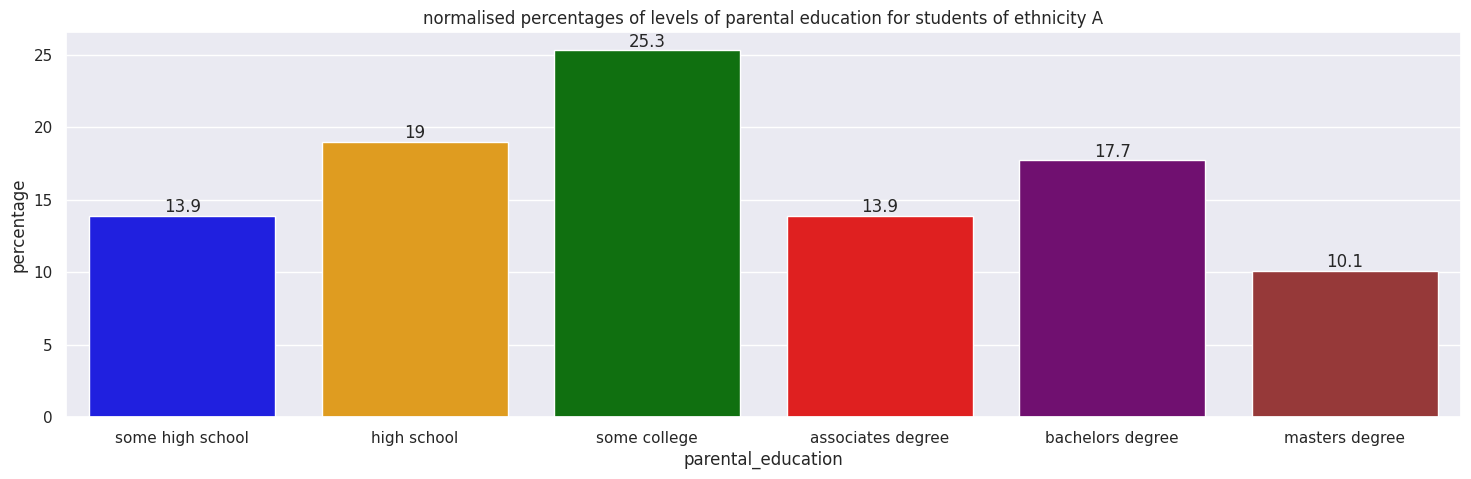

In [50]:
fig_pe_eth_a_percent = sns.barplot(x = df_pe_eth_a_vc['parental_education'], y = df_pe_eth_a_vc['percentage'])
plt.bar_label(fig_pe_eth_a_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity A')
plt.show()

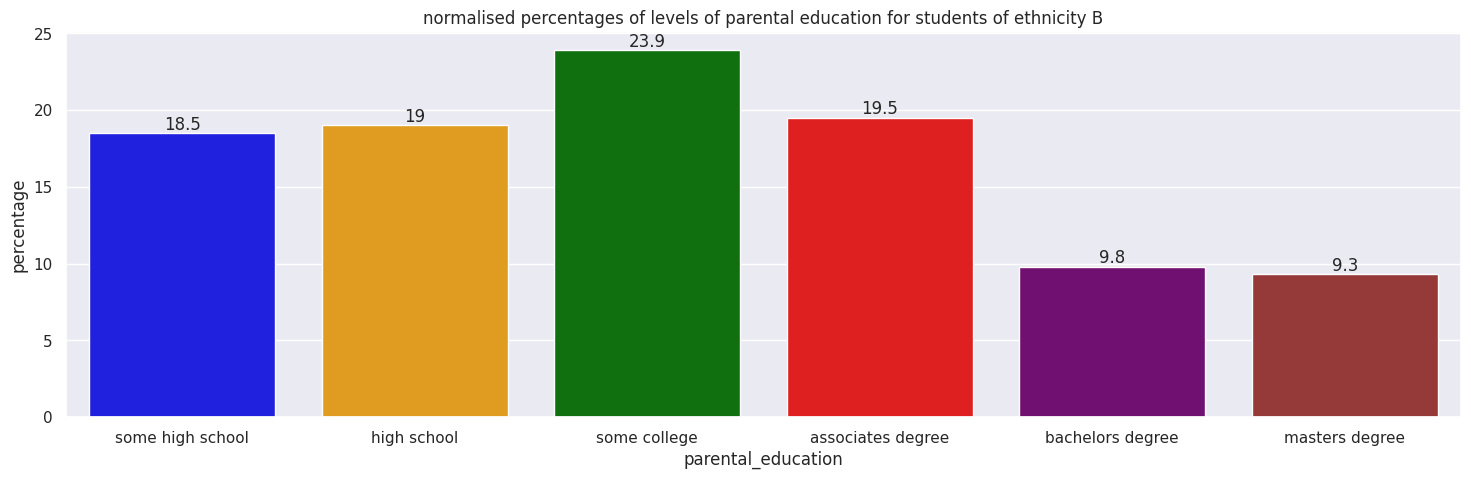

In [51]:
fig_pe_eth_b_percent = sns.barplot(x = df_pe_eth_b_vc['parental_education'], y = df_pe_eth_b_vc['percentage'])
plt.bar_label(fig_pe_eth_b_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity B')
plt.show()

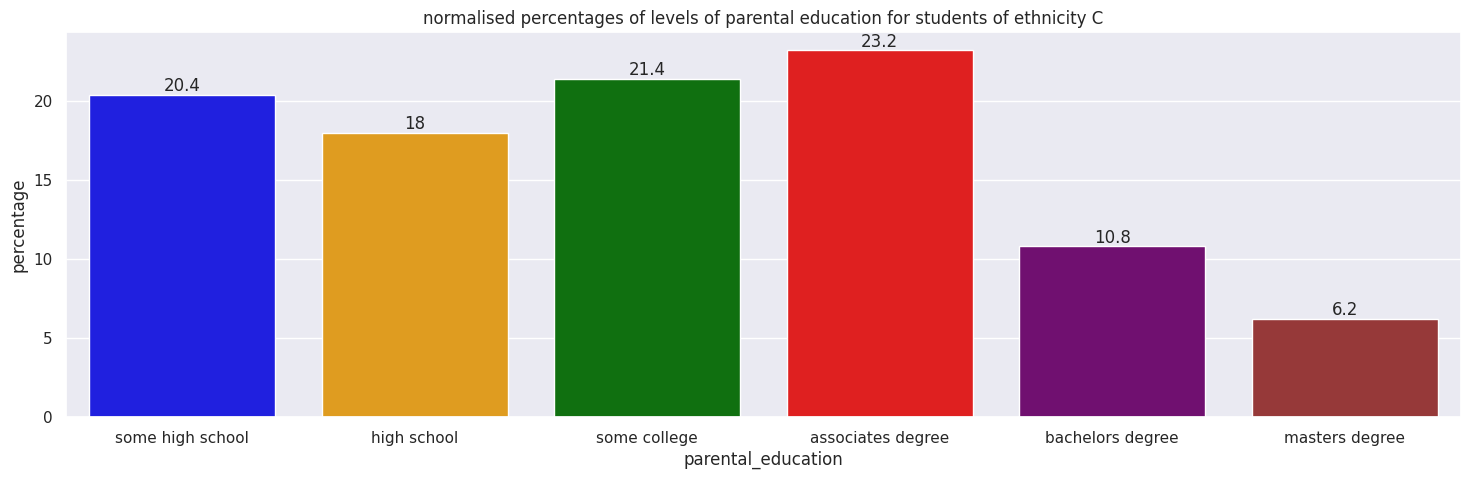

In [52]:
fig_pe_eth_c_percent = sns.barplot(x = df_pe_eth_c_vc['parental_education'], y = df_pe_eth_c_vc['percentage'])
plt.bar_label(fig_pe_eth_c_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity C')
plt.show()

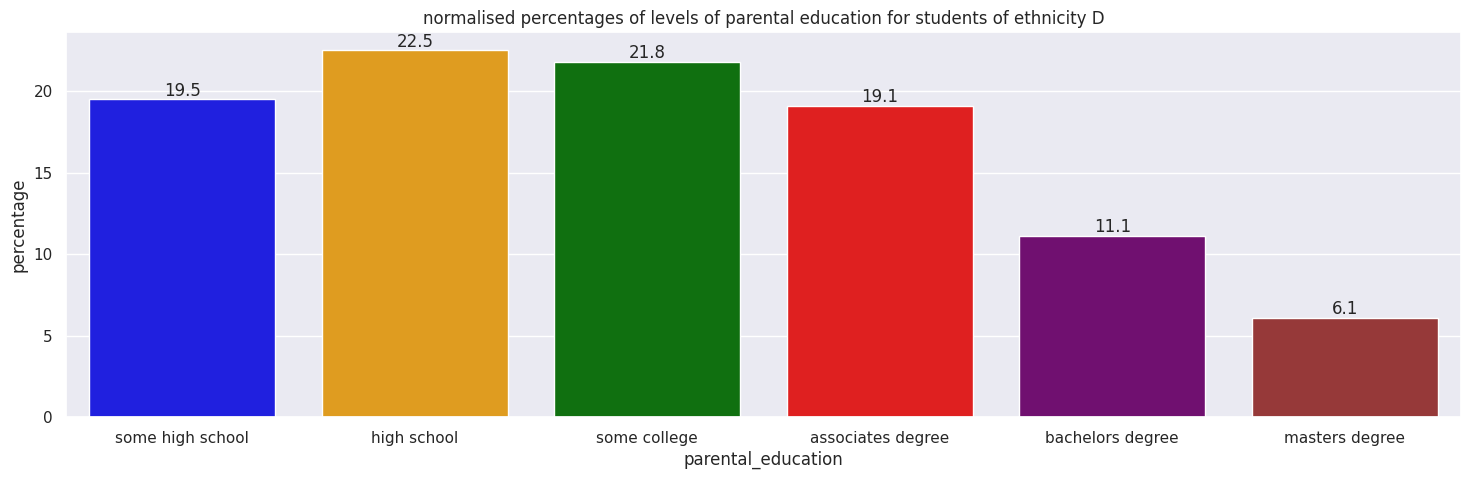

In [53]:
fig_pe_eth_d_percent = sns.barplot(x = df_pe_eth_d_vc['parental_education'], y = df_pe_eth_d_vc['percentage'])
plt.bar_label(fig_pe_eth_d_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity D')
plt.show()

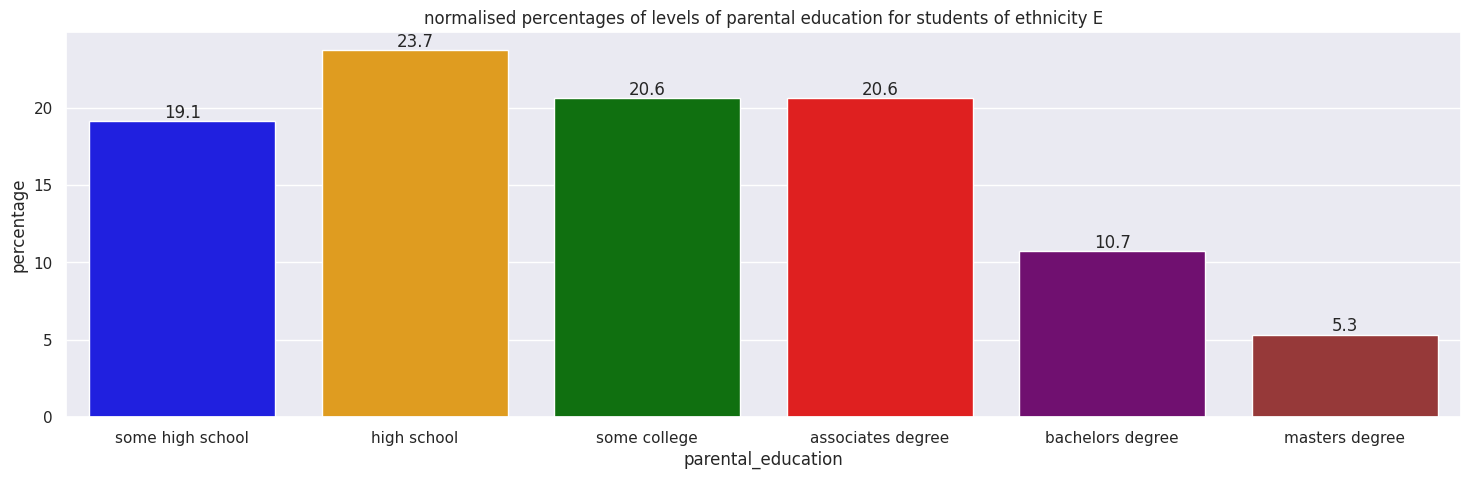

In [54]:
fig_pe_eth_e_percent = sns.barplot(x = df_pe_eth_e_vc['parental_education'], y = df_pe_eth_e_vc['percentage'])
plt.bar_label(fig_pe_eth_e_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity E')
plt.show()

There is a lot of information in these plots. To properly determine the relationships, we will consider each level of parental education.

- Parents who have only some high school education occur at a rate of approximately 20% across all ethnicities. The major exception is Ethnicity A, which has a rate of 14%. 

- Parents who have a high school education occur at a rate of about 17% to 19% for ethnicities A through C. Ethnicities D and E have rates in excess of 22%

- Parents who have some college education occur at a rate of about 20% for ethnicities C, D and E. Ethnicites A and B have a rate of about 24%

- Parents who have associates degrees occur at a rate of about 20% for ethnicities B, D and E. Ethnicity A has a rate of 14% whilst ethnicity C has a rate of 23%

- Parents who have bachelors degrees occur at a rate of about 10% for all ethnicities, except for ethnicity A, which has a rate of 17%

- Parents who have masters degrees occur at a rate of about 5 or 6% for ethnicities C, D and E. Ethnicities A and B have a rate of about 10%

Therefore, we can make some broad generalisations. 

- Students of ethnicity A appear to have more highly educated parents, with student of ethnicity B following close behind

- Students of ethnicities D and E appear to have less well educated parents, with definite biases toward the lowest education levels

- Students of ethnicity C appears to have parents with middling education levels, neither excelling nor falling behind

Therefore, we can now validate our hypothesis. It does appear that student ethnicity and parental education are linked - certain ethnicities are better educated.

This particular study is very interesting when combined with the studies into how parental_education and ethnicity affect affect test scores.

We have established that parents of students of ethnicity A are highly educated. However, students of ethnicity A appear to perform relatively poorly in their exams. The same is true of students of ethnicity C, whose parents have middling education levels, and yet perform poorly in their exams. Conversely, students of ethnicities D and E have parents who are less well educated overall, and yet these students perform very well in their exams.

This is a curious thing to identify, though we do not have the data to make further judgements.

## Ethnicity - Lunch program

We can now begin to validate the hypothesis that student ethnicity has an influence on their participation rate in the lunch programs. We know from our analyses up to this point that ethnicity influences parental education, but that parental education has no real influence on the lunch program of the student. Therefore, this analysis could go either way.

As always, we must first filter the dataframe

- `df_eth_lp` is short for `dataframe ethnicity lunch program`

In [55]:
df_eth_lp = df.filter(['ethnicity', 'lunch_program'])
df_eth_lp.head()

,ethnicity,lunch_program
0,1,1
1,4,2
2,5,2
3,2,1
4,5,1


Now we can query this dataframe by `lunch_program`

- `df_eth_lp_std` is short for `dataframe ethnicity lunch program standard`

- `df_eth_lp_fr` is short for `dataframe ethnicity lunch program free/reduced`

In [56]:
df_eth_lp_std = df_eth_lp.query('lunch_program == 1')
df_eth_lp_std.head()
# Standard lunch program

,ethnicity,lunch_program
0,1,1
3,2,1
4,5,1
5,4,1
6,1,1


In [57]:
df_eth_lp_fr = df_eth_lp.query('lunch_program == 2')
df_eth_lp_fr.head()
# Free/ reduced lunch program

,ethnicity,lunch_program
1,4,2
2,5,2
9,3,2
15,5,2
18,3,2


Now we can generate the normalised value counts

- `series_eth_lp_std` is short for `series ethnicity lunch program standard`

- `series_eth_lp_fr_vc` is short for `series ethnicity lunch program free/reduced`

In [58]:
series_eth_lp_std = df_eth_lp_std['ethnicity'].value_counts(normalize=True).sort_index()
series_eth_lp_std
# standard lunch program

1    0.081288
2    0.207055
3    0.319018
4    0.282209
5    0.110429
Name: ethnicity, dtype: float64

In [59]:
series_eth_lp_fr = df_eth_lp_fr['ethnicity'].value_counts(normalize=True).sort_index()
series_eth_lp_fr
# free/reduced lunch program

1    0.074713
2    0.201149
3    0.330460
4    0.224138
5    0.169540
Name: ethnicity, dtype: float64

Now we can generate the dataframes.

- `df_eth_lp_std_vc` is short for `dataframe ethnicity lunch program standard value counts`

- `df_eth_lp_fr_vc` is short for `dataframe ethnicity lunch program free/reduced value counts`

In [60]:
df_eth_lp_std_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'normalised value counts': series_eth_lp_std,
    'percentage': (series_eth_lp_std * 100).round(1)
})

df_eth_lp_std_vc

,ethnicity,normalised value counts,percentage
1,Group A,0.081288,8.1
2,Group B,0.207055,20.7
3,Group C,0.319018,31.9
4,Group D,0.282209,28.2
5,Group E,0.110429,11.0


In [61]:
df_eth_lp_fr_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'normalised value counts': series_eth_lp_fr,
    'percentage': (series_eth_lp_fr * 100).round(1)
})

df_eth_lp_fr_vc

,ethnicity,normalised value counts,percentage
1,Group A,0.074713,7.5
2,Group B,0.201149,20.1
3,Group C,0.330460,33.0
4,Group D,0.224138,22.4
5,Group E,0.169540,17.0


And now the barplots:

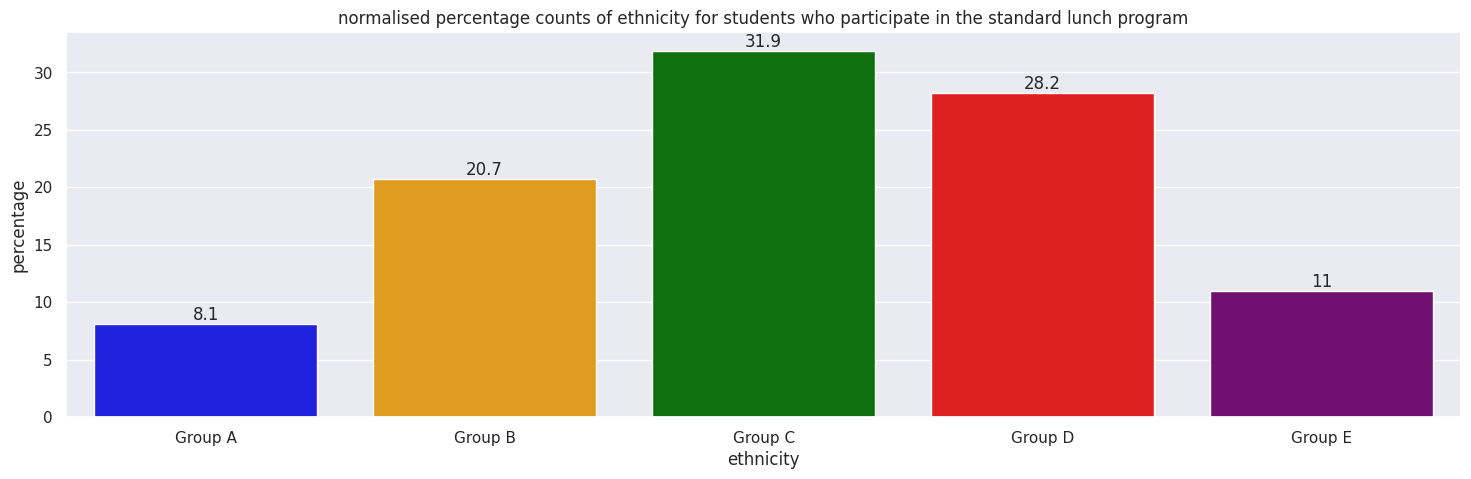

In [62]:
fig_eth_lp_std_percent = sns.barplot(x = df_eth_lp_std_vc['ethnicity'], y = df_eth_lp_std_vc['percentage'])
plt.bar_label(fig_eth_lp_std_percent.containers[0])
plt.title('normalised percentage counts of ethnicity for students who participate in the standard lunch program')
plt.show()

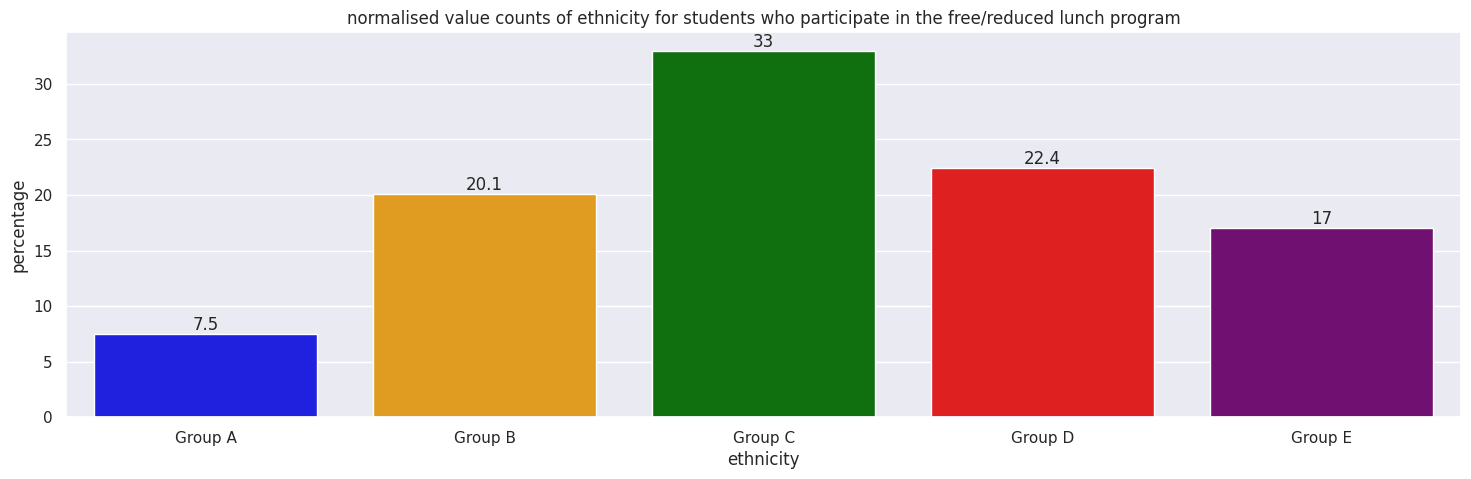

In [63]:
fig_eth_lp_fr_percent = sns.barplot(x = df_eth_lp_fr_vc['ethnicity'], y = df_eth_lp_fr_vc['percentage'])
plt.bar_label(fig_eth_lp_fr_percent.containers[0])
plt.title('normalised value counts of ethnicity for students who participate in the free/reduced lunch program')
plt.show()

The differences in bar height indicate that the hypothesis is true but slight. There is a link, but it is not large. Group D participates in the standard program at a higher rate than the free/reduced lunch program, and group E participates in the free/reduced lunch program at a higher rate than the standard program. There is no real difference in participation rate for the other ethnicities.

## Ethnicity - Test preparation course

We can now begin to validate the hypothesis that a student's ethnicity has an influence on their participation in the test preparation course. We know from our previous analyses that student ethnicity influences parental education, and that parental education influences participation in the test preparation course. Therefore, student ethnicity should influence participation in the test preparation course.

Firstly, we filter the dataframe to the relevant columns.

- `df_gen_tpc` is short for `dataframe gender test preparation course`

In [64]:
df_eth_tpc = df.filter(['ethnicity', 'test_preparation_course'])
df_eth_tpc.head()

,ethnicity,test_preparation_course
0,1,1
1,4,2
2,5,2
3,2,2
4,5,1


Now we query by `test_preparation_course`

- `df_eth_tpc_comp` is short for `dataframe ethnicity test preparation course completed`

- `df_eth_tpc_not` is short for `dataframe ethnicity test preparation course not completed`

In [65]:
df_eth_tpc_comp = df_eth_tpc.query('test_preparation_course == 1')
df_eth_tpc_comp.head()
# Students who have completed the test preparation course

,ethnicity,test_preparation_course
0,1,1
4,5,1
7,5,1
10,5,1
11,4,1


In [66]:
df_eth_tpc_not = df_eth_tpc.query('test_preparation_course == 2')
df_eth_tpc_not.head()
# students who have NOT completed the test preparation course

,ethnicity,test_preparation_course
1,4,2
2,5,2
3,2,2
5,4,2
6,1,2


And now the normalised value counts

- `series_eth_tpc_comp` is short for `series ethnicity test preparation course completed`

- `series_eth_tpc_not` is short for `series ethnicity test preparation course not completed`

In [67]:
series_eth_tpc_comp = df_eth_tpc_comp['ethnicity'].value_counts(normalize=True).sort_index()
series_eth_tpc_comp
# test preparation course completed

1    0.095522
2    0.214925
3    0.304478
4    0.250746
5    0.134328
Name: ethnicity, dtype: float64

In [68]:
series_eth_tpc_not = df_eth_tpc_not['ethnicity'].value_counts(normalize=True).sort_index()
series_eth_tpc_not
# test preparation course NOT completed

1    0.070677
2    0.200000
3    0.332331
4    0.267669
5    0.129323
Name: ethnicity, dtype: float64

Now we construct the dataframes with which we will construct the bar plots. 

- `df_eth_tpc_comp_vc` is short for `dataframe ethnicity test preparation course completed value counts`

- `df_eth_tpc_not_vc` is short for `dataframe ethnicity test preparation course not completed value counts`

In [69]:
df_eth_tpc_comp_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'normalised value counts': series_eth_tpc_comp,
    'percentage': (series_eth_tpc_comp * 100).round(1)
})

df_eth_tpc_comp_vc.head()

,ethnicity,normalised value counts,percentage
1,Group A,0.095522,9.6
2,Group B,0.214925,21.5
3,Group C,0.304478,30.4
4,Group D,0.250746,25.1
5,Group E,0.134328,13.4


In [70]:
df_eth_tpc_not_vc = pd.DataFrame(data={
    'ethnicity': ('Group A', 'Group B', 'Group C', 'Group D', 'Group E'),
    'normalised value counts': series_eth_tpc_not,
    'percentage': (series_eth_tpc_not * 100).round(1)
})

df_eth_tpc_not_vc.head()

,ethnicity,normalised value counts,percentage
1,Group A,0.070677,7.1
2,Group B,0.200000,20.0
3,Group C,0.332331,33.2
4,Group D,0.267669,26.8
5,Group E,0.129323,12.9


And now the barplots:

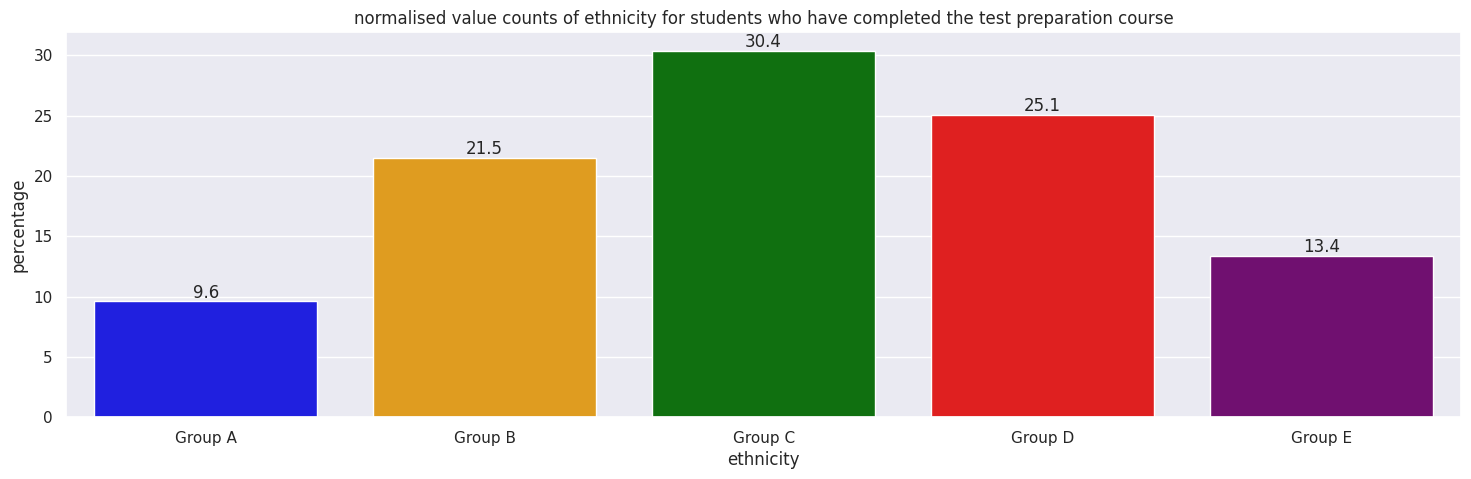

In [71]:
fig_eth_tpc_comp_percent = sns.barplot(x = df_eth_tpc_comp_vc['ethnicity'], y = df_eth_tpc_comp_vc['percentage'])
plt.bar_label(fig_eth_tpc_comp_percent.containers[0])
plt.title('normalised value counts of ethnicity for students who have completed the test preparation course')
plt.show()

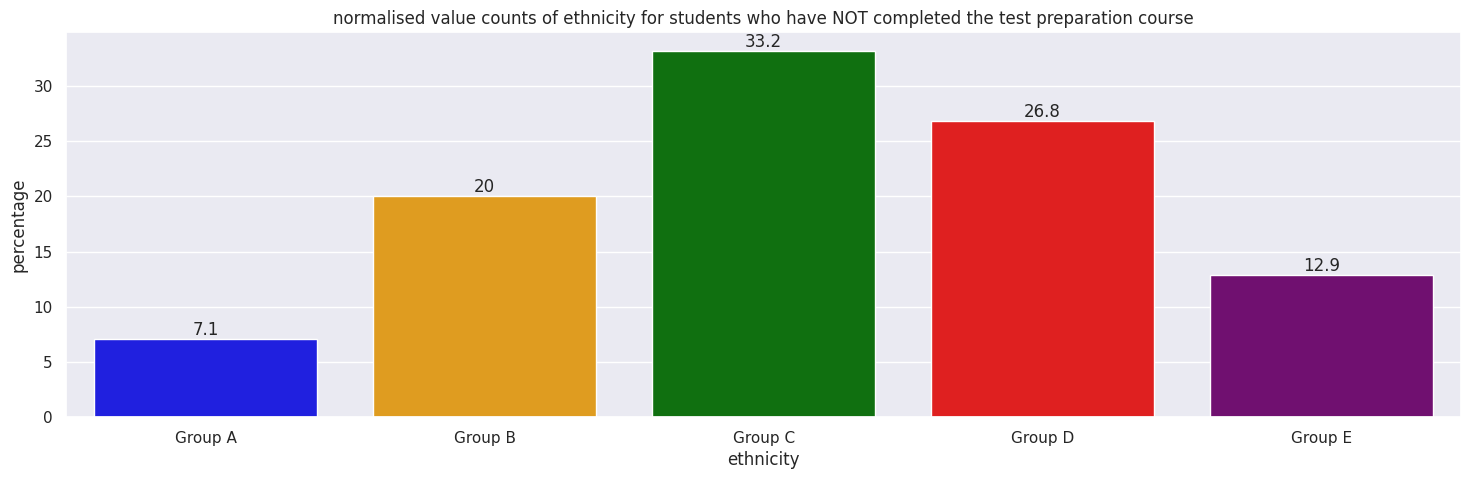

In [72]:
fig_eth_tpc_not_percent = sns.barplot(x = df_eth_tpc_not_vc['ethnicity'], y = df_eth_tpc_not_vc['percentage'])
plt.bar_label(fig_eth_tpc_not_percent.containers[0])
plt.title('normalised value counts of ethnicity for students who have NOT completed the test preparation course')
plt.show()

These plots indicate that the hypothesis is true but slight. Ethnic group A appears to participate in the test preparation course at a slightly higher rate, and ethnic group C appears to participate at a slightly lower rate.

## Gender - Test preparation course

We know from our previous analyses that male and female students achieve markedly different scores in each of the stubjects. Male students perform better in mathematics, whereas female students perform better in reading and writing. We also know that the test preparation course has an effect on a student's test scores. It is therefore possible that one gender participates in the test preparation course more than the other.

First, as always, we must filter the dataframe down to the relevant columns. `df_gen_tpc` is short for `dataframe gender test preparation course`

In [73]:
df_gen_tpc = df.filter(['gender', 'test_preparation_course'])
df_gen_tpc.head()

,gender,test_preparation_course
0,1,1
1,2,2
2,1,2
3,1,2
4,1,1


Now we can query that dataframe by gender, so that we can understand the participation rates for each gender.

- `df_gen_tpc_comp` is short for `dataframe gender test preparation course completed`

- `df_gen_tpc_not` is short for `dataframe gender test preparation course not completed`

In [74]:
df_gen_tpc_comp = df_gen_tpc.query('gender == 1')
df_gen_tpc_comp.head()
# Male students

,gender,test_preparation_course
0,1,1
2,1,2
3,1,2
4,1,1
7,1,1


In [75]:
df_gen_tpc_not = df_gen_tpc.query('gender == 2')
df_gen_tpc_not.head()
# Female students

,gender,test_preparation_course
1,2,2
5,2,2
6,2,2
11,2,1
17,2,1


Now we can get the normalised value counts. In the variable names, series indicates that it is a Pandas Series

- `series_gen_tpc_comp` is short for `series gender test preparation course completed`

- `series_gen_tpc_not` is short for `series gender test preparation course not completed`

In [76]:
series_gen_tpc_comp = df_gen_tpc_comp['test_preparation_course'].value_counts(normalize=True).sort_index()
series_gen_tpc_comp
# male students

1    0.338491
2    0.661509
Name: test_preparation_course, dtype: float64

In [77]:
series_gen_tpc_not = df_gen_tpc_not['test_preparation_course'].value_counts(normalize=True).sort_index()
series_gen_tpc_not
# female students

1    0.331263
2    0.668737
Name: test_preparation_course, dtype: float64

Even at this stage, the normalised value counts series indicate that there is no real difference in test preparation course participation rates for each gender. Still, we will create dataframes and construct plots for visualisation purposes.

- `df_gen_tpc_comp_vc` is short for `dataframe gender test preparation course completed value counts`

- `df_gen_tpc_not_vc` is short for `dataframe gender test preparation course not completed value counts`

In [78]:
df_gen_tpc_comp_vc = pd.DataFrame(data={
    'test preparation course': ('completed', 'not completed'),
    'normalised value counts': series_gen_tpc_comp,
    'percentage': (series_gen_tpc_comp * 100).round(1)
})

df_gen_tpc_comp_vc.head()

,test preparation course,normalised value counts,percentage
1,completed,0.338491,33.8
2,not completed,0.661509,66.2


In [79]:
df_gen_tpc_not_vc = pd.DataFrame(data={
    'test preparation course': ('completed', 'not completed'),
    'normalised value counts': series_gen_tpc_not,
    'percentage': (series_gen_tpc_not * 100).round(1)
})

df_gen_tpc_not_vc.head()

,test preparation course,normalised value counts,percentage
1,completed,0.331263,33.1
2,not completed,0.668737,66.9


And now the plots:

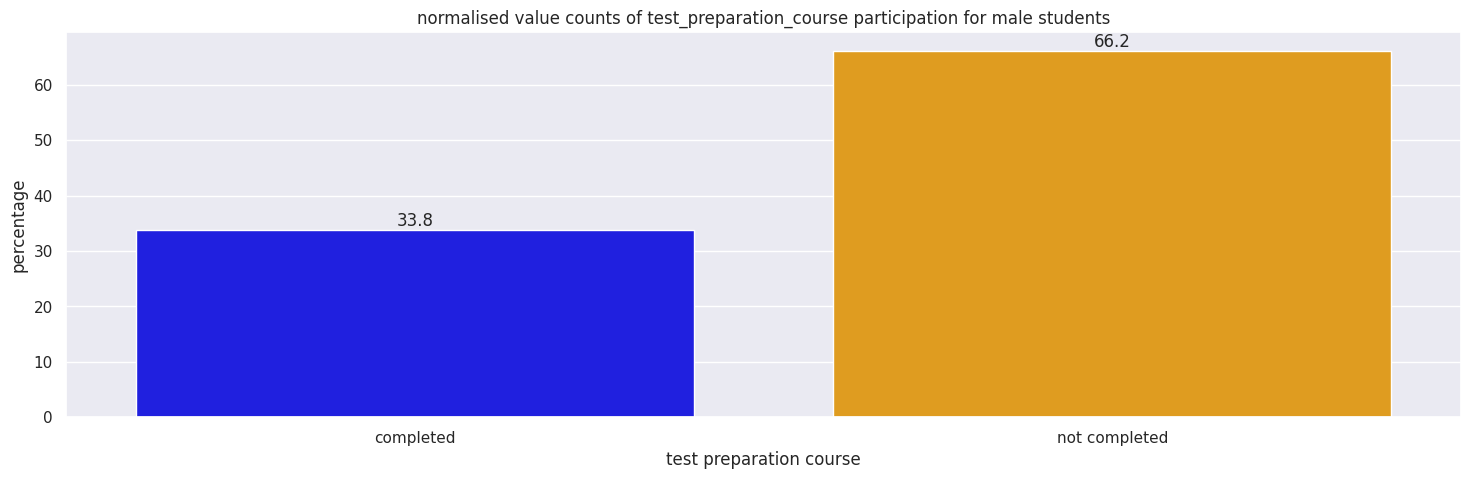

In [80]:
fig_gen_tpc_comp_percent = sns.barplot(x = df_gen_tpc_comp_vc['test preparation course'], y = df_gen_tpc_comp_vc['percentage'])
plt.bar_label(fig_gen_tpc_comp_percent.containers[0])
plt.title('normalised value counts of test_preparation_course participation for male students')
plt.show()

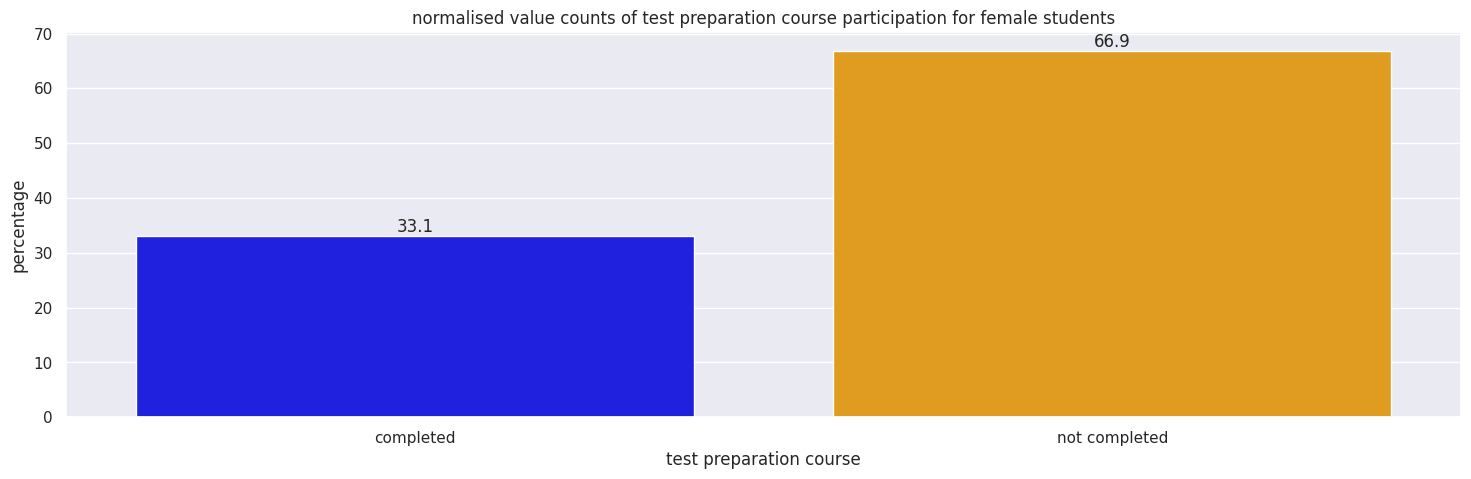

In [81]:
fig_gen_tpc_not_percent = sns.barplot(x = df_gen_tpc_not_vc['test preparation course'], y = df_gen_tpc_not_vc['percentage'])
plt.bar_label(fig_gen_tpc_not_percent.containers[0])
plt.title('normalised value counts of test preparation course participation for female students')
plt.show()

As we can see, there is no material difference in participation rates for each gender. Male students tend to participate in the test preparation course at a very slightly higher rate than female students, but this is not statistically significant.

## Conclusions

For the sake of completeness, we will now gather the observations from these analyses in one place:

- Parental education does have an influence on their childrens' participation in the test preparation course:

    - Students of better educated parents participate in the test preparation course at a higher rate

    - We also know that participation in the test preparation course improves test scores

    - Parental education cannot logically be improved, but we can more strongly encourage students to participate in the test preparation course, so therefore we can boost the participation of students from less educated parents in the test preparation course
    
<br>

- Parental education slightly influences the lunch program their children participate in. Students of better educated parents participate in the standard lunch program at a slightly higher rate

- Student ethnicity definitively influences parental education:

    - Ethnicity A appears to be the most highly educated, with ethnicity B following close behind

    - Ethnicities D and E appear to be less educated, with definite biases toward the lowest education levels

    - Ethnicity C appears to have middling education levels, neither excelling nor falling behind

    - Therefore, in a very long term timeframe, we can probably do more to encourage ethnicities C, D and E to become more highly educated
 
- Student ethnicity slightly influences the lunch program that the student participates in

- Student ethnicity slightly influences their participation in the test preparation course

- Student gender does not meaningfully influence their participation in the test preparation course

Overall, the categorical feature variables are mostly independent - they affect or influence each other only slightly in most cases. The only cases where the influence is more than slight is with the hypothesis that student ethnicity is connected to parental education - we can say that certain ethnicities are definitively more highly educated than each others.

## Save plots

We can now save the plots above. Even though we have generated a large number of plots, we should save all of them, so that we can show that we can validate all of the secondary hypotheses.

### Hypothesis 6 - Parental education - test preparation course

Before we can save the plots that show that parental education influences a student's participation in the test preparation course, we must first create the directories to hold them for later retrieval:

In [82]:
try:
  os.makedirs(name='outputs/plots/parental-education-test-prep-course') # create outputs/plots/parental-education-test-prep-course folder
except Exception as e:
  print(e)

filepath_pe_tpc = 'outputs/plots/parental-education-test-prep-course'

[Errno 17] File exists: 'outputs/plots/parental-education-test-prep-course'


Now we can save the plots:

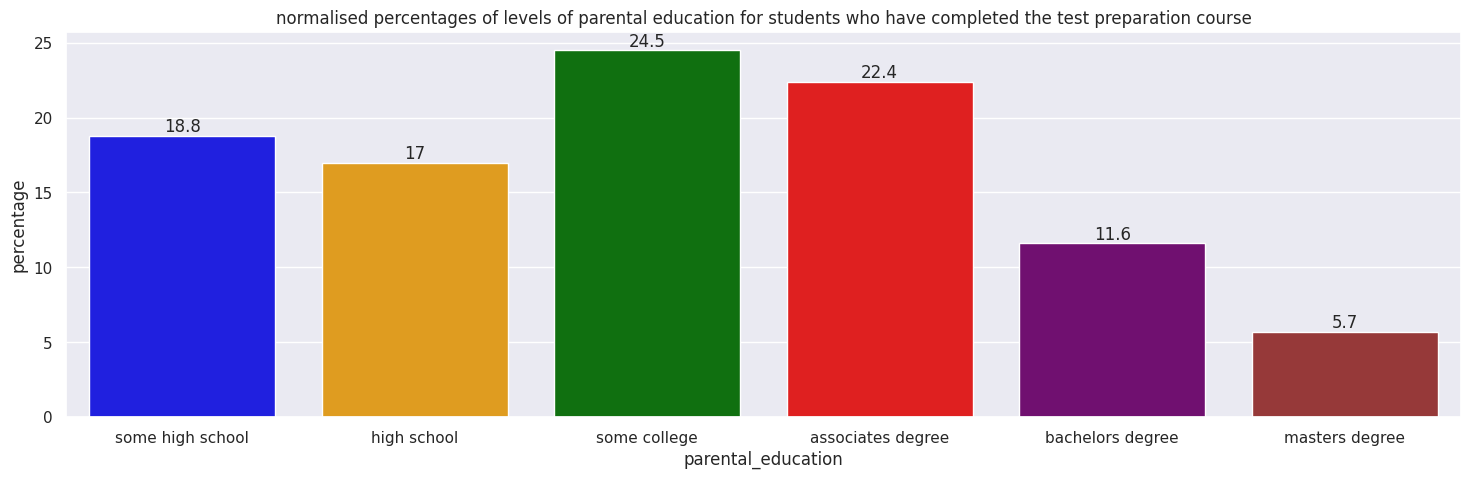

In [83]:
! rm outputs/plots/parental-education-test-prep-course/parental-education-test-prep-course-completed.png

fig_pe_tpc_comp_percent = sns.barplot(x = df_pe_tpc_comp_vc['parental_education'], y = df_pe_tpc_comp_vc['percentage'])
plt.bar_label(fig_pe_tpc_comp_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who have completed the test preparation course')
plt.savefig(f'{filepath_pe_tpc}/parental-education-test-prep-course-completed.png')

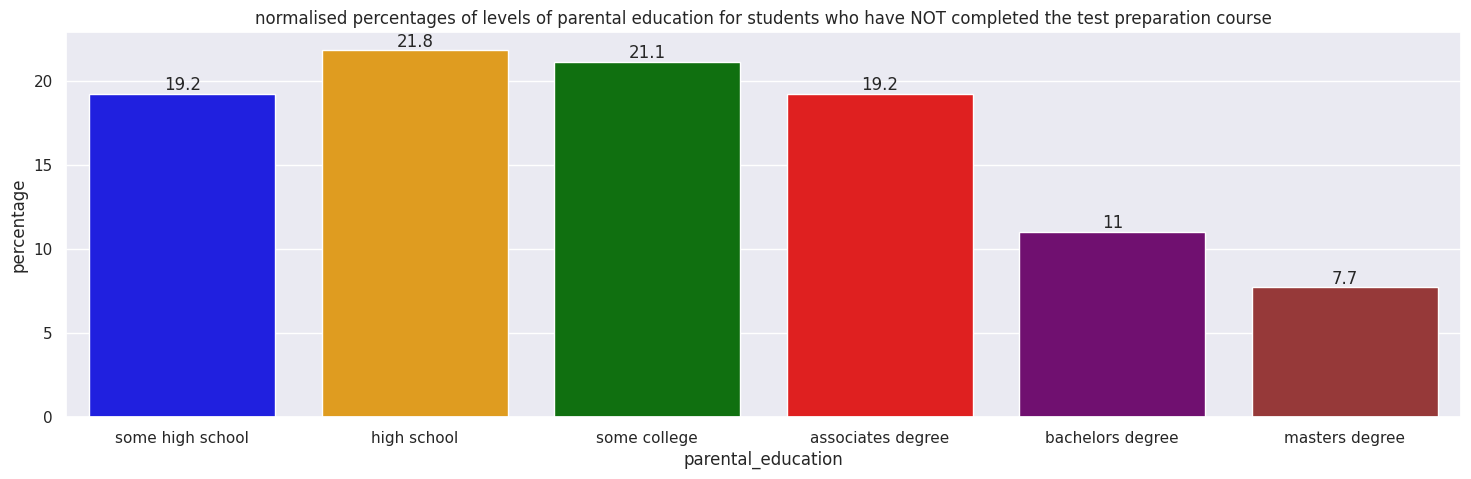

In [84]:
! rm outputs/plots/parental-education-test-prep-course/parental-education-test-prep-course-none.png

fig_pe_tpc_not_percent = sns.barplot(x = df_pe_tpc_not_vc['parental_education'], y = df_pe_tpc_not_vc['percentage'])
plt.bar_label(fig_pe_tpc_not_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who have NOT completed the test preparation course')
plt.savefig(f'{filepath_pe_tpc}/parental-education-test-prep-course-none.png')

### Hypothesis 7 - Parental education - lunch program

We can now save the plots that show that there is a slight link between a student's parental education and their lunch program

In [85]:
try:
  os.makedirs(name='outputs/plots/parental-education-lunch-program') # create outputs/plots/parental-education-lunch-program folder
except Exception as e:
  print(e)

filepath_pe_lp = 'outputs/plots/parental-education-lunch-program'

[Errno 17] File exists: 'outputs/plots/parental-education-lunch-program'


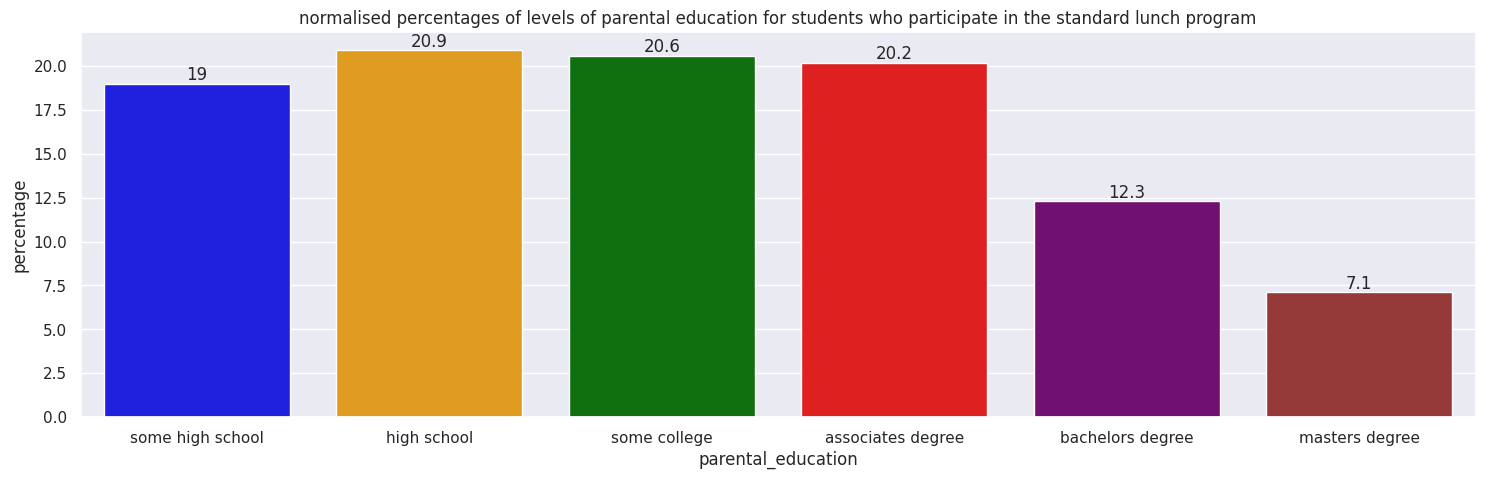

In [86]:
! rm outputs/plots/parental-education-lunch-program/parental-education-lunch-program-std.png

fig_pe_lp_std_percent = sns.barplot(x = df_pe_lp_std_vc['parental_education'], y = df_pe_lp_std_vc['percentage'])
plt.bar_label(fig_pe_lp_std_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who participate in the standard lunch program')
plt.savefig(f'{filepath_pe_lp}/parental-education-lunch-program-std.png')

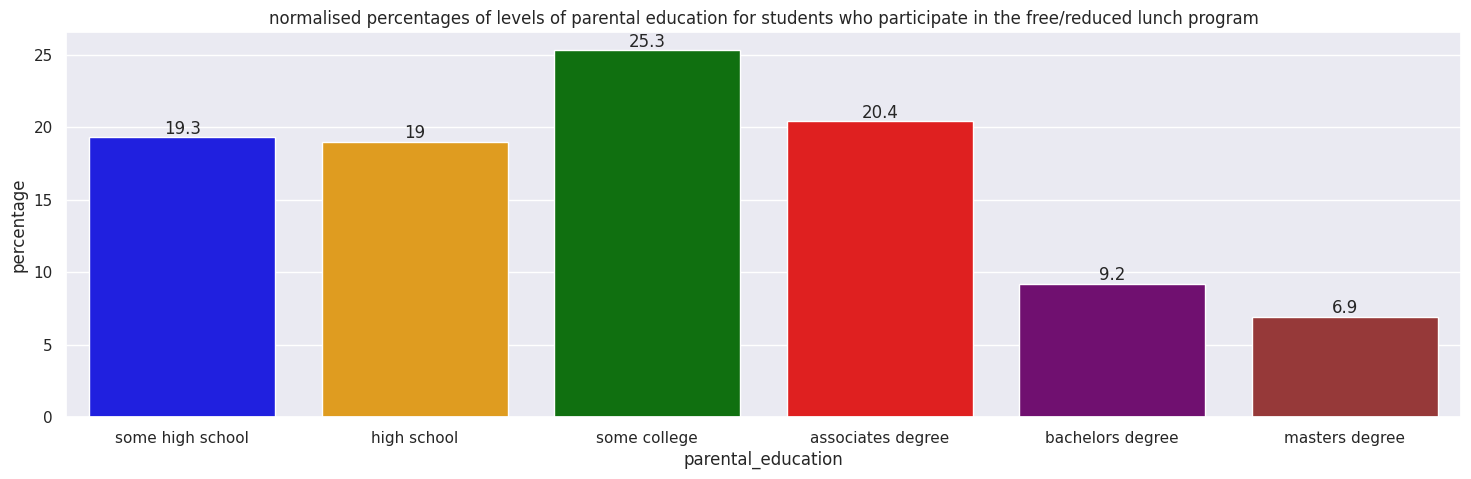

In [87]:
! rm outputs/plots/parental-education-lunch-program/parental-education-lunch-program-fr.png

fig_pe_lp_fr_percent = sns.barplot(x = df_pe_lp_fr_vc['parental_education'], y = df_pe_lp_fr_vc['percentage'])
plt.bar_label(fig_pe_lp_fr_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students who participate in the free/reduced lunch program')
plt.savefig(f'{filepath_pe_lp}/parental-education-lunch-program-fr.png')

### Hypothesis 8 - Parental education - ethnicity

We can now save the plots that show that certain ethnicities are better educated than others. First, we must create the necessary directory:

In [88]:
try:
  os.makedirs(name='outputs/plots/parental-education-ethnicity') # create outputs/plots/parental-education-ethnicity folder
except Exception as e:
  print(e)

filepath_eth_pe = 'outputs/plots/parental-education-ethnicity'

[Errno 17] File exists: 'outputs/plots/parental-education-ethnicity'


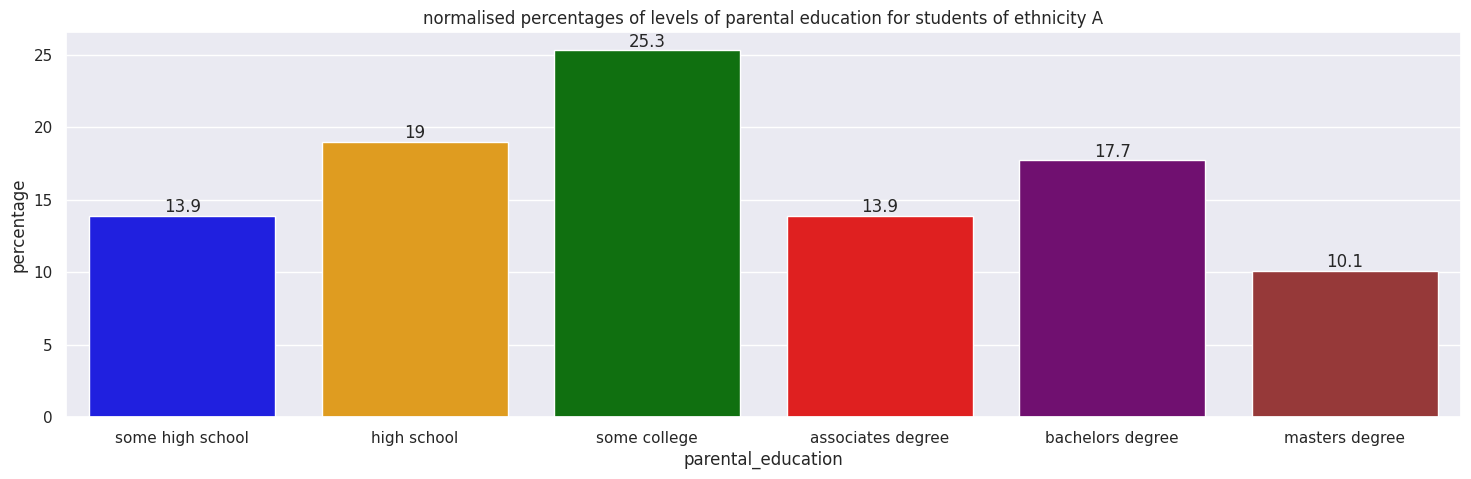

In [89]:
! rm outputs/plots/parental-education-ethnicity/parental-education-ethnicity-a.png

fig_pe_eth_a_percent = sns.barplot(x = df_pe_eth_a_vc['parental_education'], y = df_pe_eth_a_vc['percentage'])
plt.bar_label(fig_pe_eth_a_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity A')
plt.savefig(f'{filepath_eth_pe}/parental-education-ethnicity-a.png')

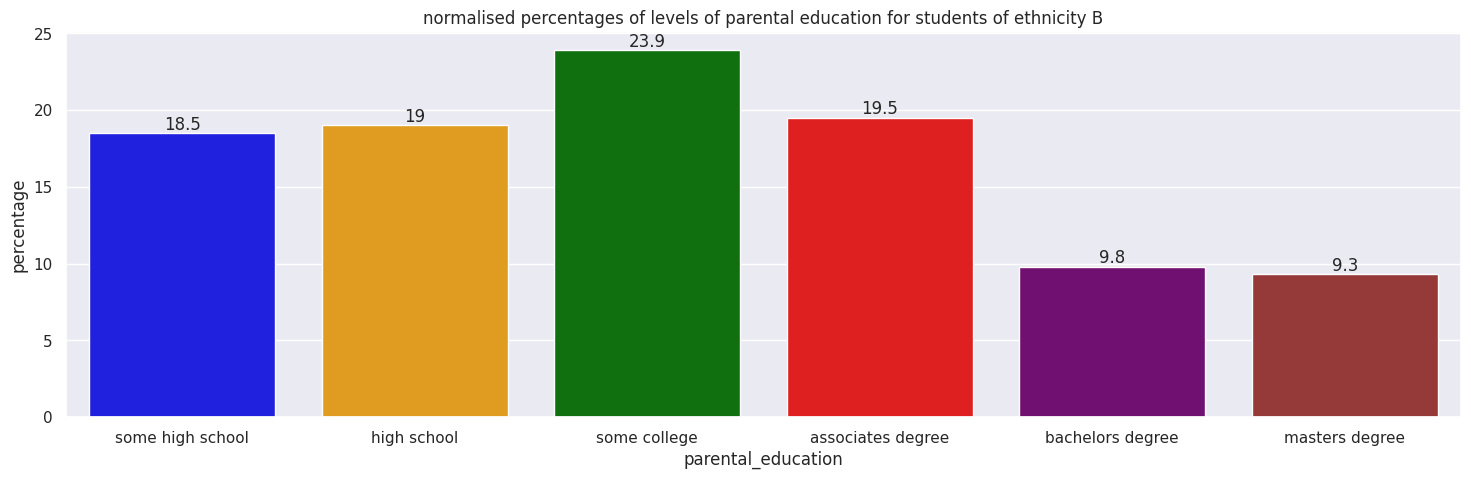

In [90]:
! rm outputs/plots/parental-education-ethnicity/parental-education-ethnicity-b.png

fig_pe_eth_b_percent = sns.barplot(x = df_pe_eth_b_vc['parental_education'], y = df_pe_eth_b_vc['percentage'])
plt.bar_label(fig_pe_eth_b_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity B')

plt.savefig(f'{filepath_eth_pe}/parental-education-ethnicity-b.png')

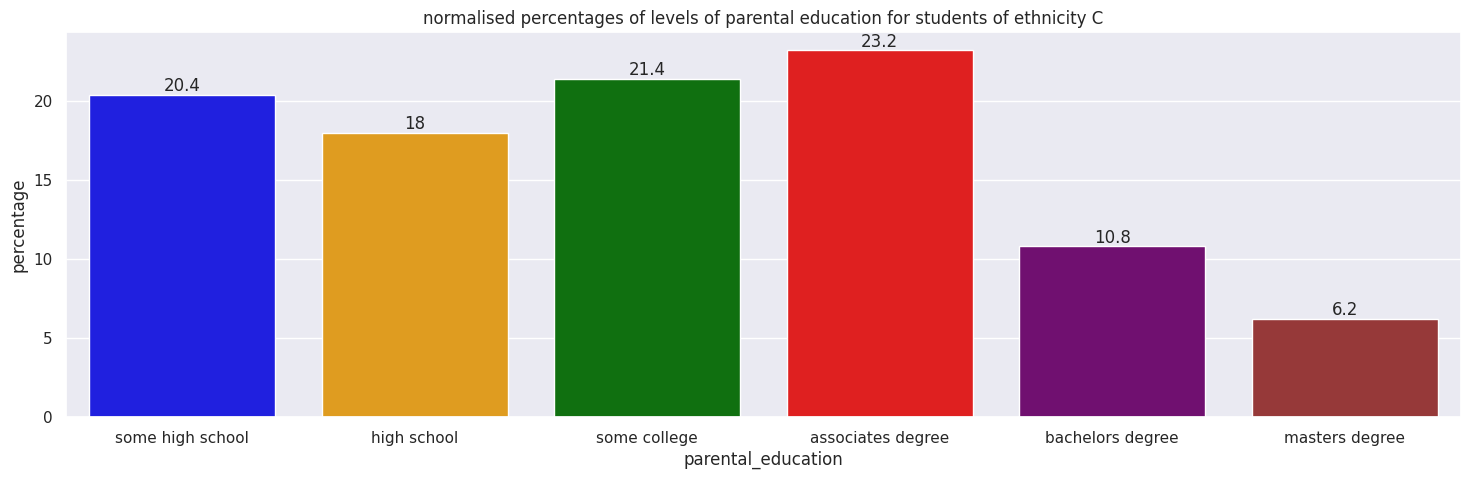

In [91]:
! rm outputs/plots/parental-education-ethnicity/parental-education-ethnicity-c.png

fig_pe_eth_c_percent = sns.barplot(x = df_pe_eth_c_vc['parental_education'], y = df_pe_eth_c_vc['percentage'])
plt.bar_label(fig_pe_eth_c_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity C')

plt.savefig(f'{filepath_eth_pe}/parental-education-ethnicity-c.png')

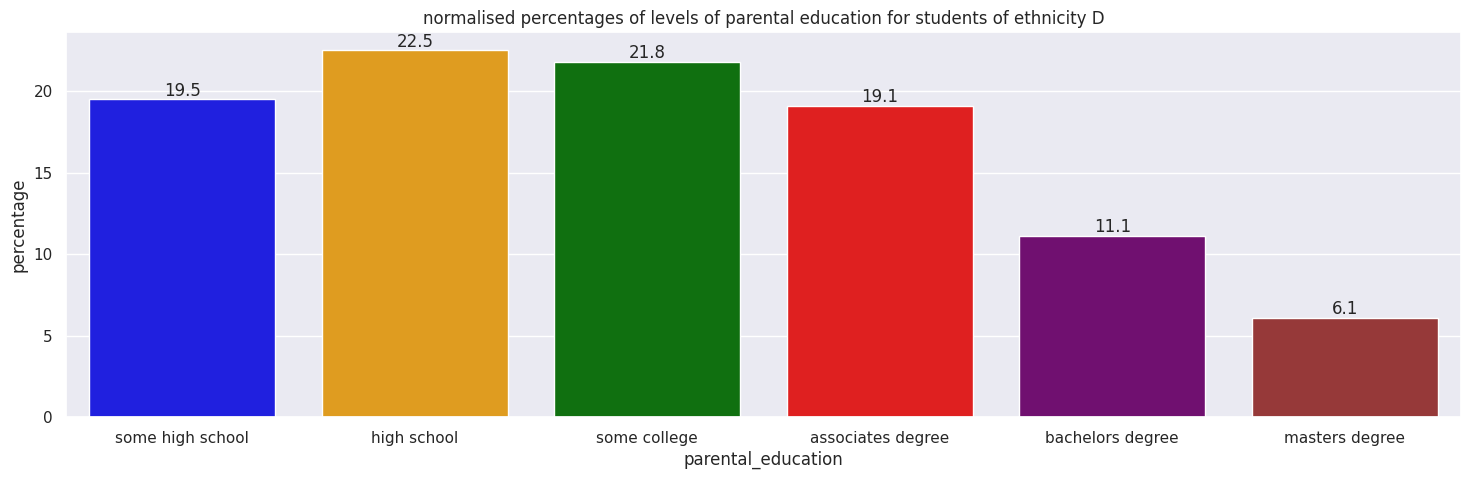

In [92]:
! rm outputs/plots/parental-education-ethnicity/parental-education-ethnicity-d.png

fig_pe_eth_d_percent = sns.barplot(x = df_pe_eth_d_vc['parental_education'], y = df_pe_eth_d_vc['percentage'])
plt.bar_label(fig_pe_eth_d_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity D')

plt.savefig(f'{filepath_eth_pe}/parental-education-ethnicity-d.png')

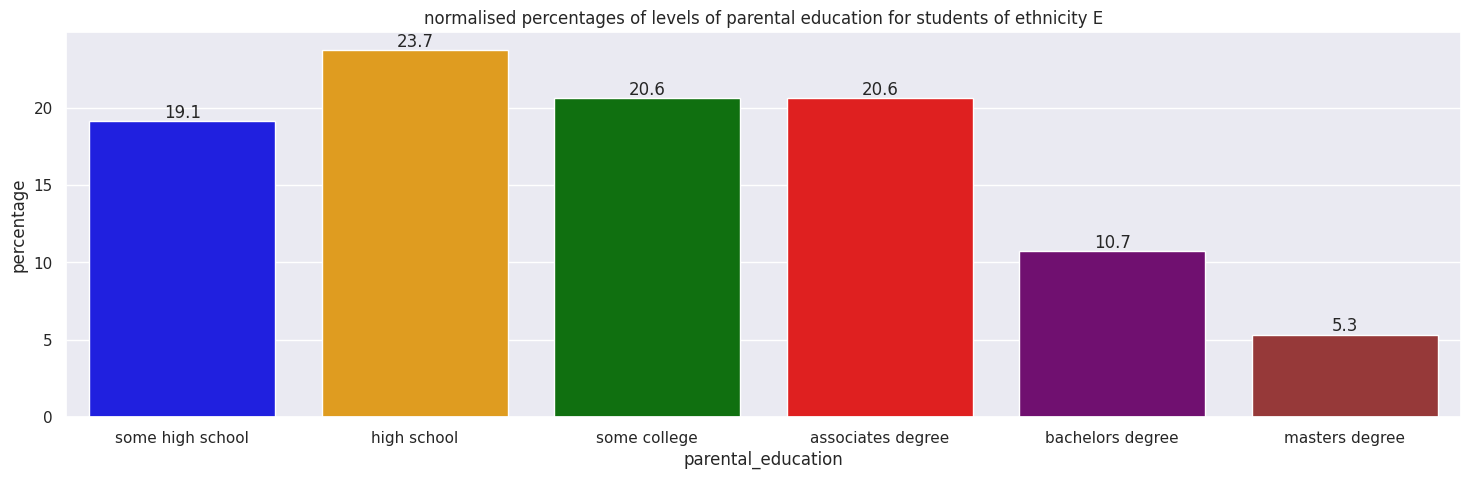

In [93]:
! rm outputs/plots/parental-education-ethnicity/parental-education-ethnicity-e.png

fig_pe_eth_e_percent = sns.barplot(x = df_pe_eth_e_vc['parental_education'], y = df_pe_eth_e_vc['percentage'])
plt.bar_label(fig_pe_eth_e_percent.containers[0])
plt.title('normalised percentages of levels of parental education for students of ethnicity E')

plt.savefig(f'{filepath_eth_pe}/parental-education-ethnicity-e.png')

### Hypothesis 9 - ethnicity - lunch program

We can now save the plots that show a slight link between a student's ethnicity and their lunch program

In [94]:
try:
  os.makedirs(name='outputs/plots/ethnicity-lunch-program') # create outputs/plots/ethnicity-lunch-program folder
except Exception as e:
  print(e)

filepath_eth_lp = 'outputs/plots/ethnicity-lunch-program'

[Errno 17] File exists: 'outputs/plots/ethnicity-lunch-program'


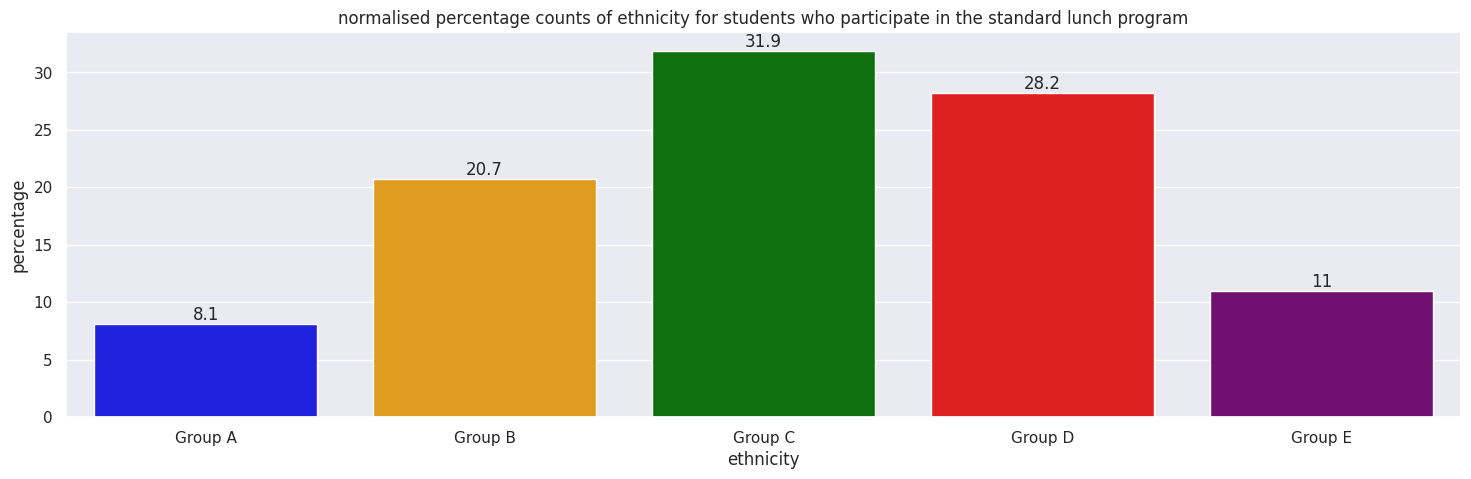

In [95]:
! rm outputs/plots/ethnicity-lunch-program/ethnicity-lunch-program-std.png

fig_eth_lp_std_percent = sns.barplot(x = df_eth_lp_std_vc['ethnicity'], y = df_eth_lp_std_vc['percentage'])
plt.bar_label(fig_eth_lp_std_percent.containers[0])
plt.title('normalised percentage counts of ethnicity for students who participate in the standard lunch program')
plt.savefig(f'{filepath_eth_lp}/ethnicity-lunch-program-std.png')

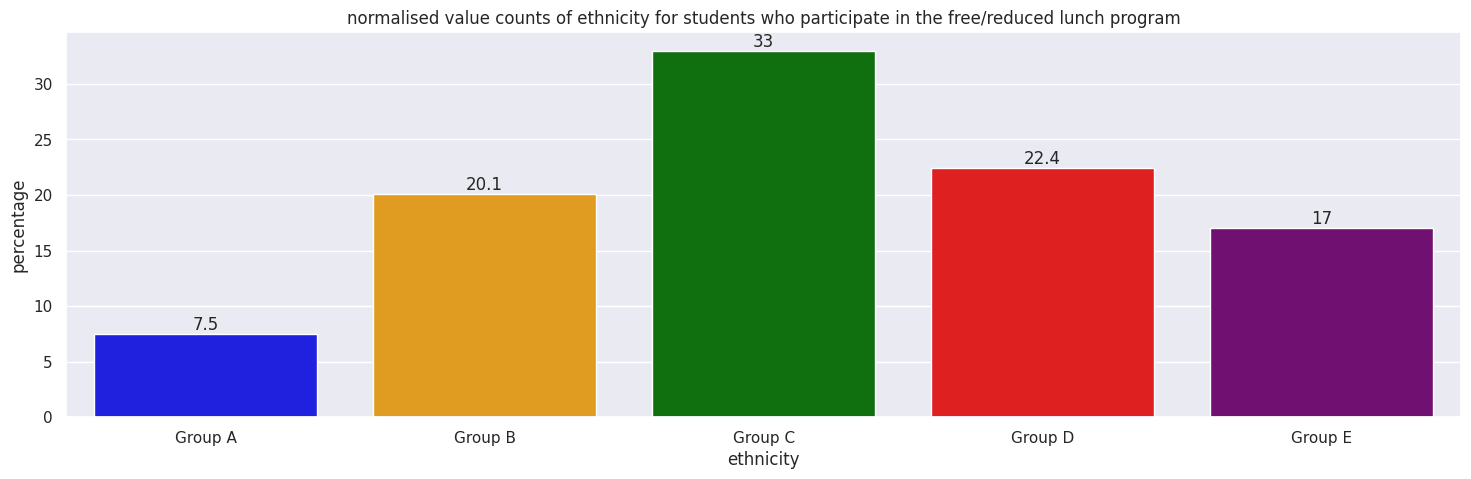

In [96]:
! rm outputs/plots/ethnicity-lunch-program/ethnicity-lunch-program-fr.png

fig_eth_lp_fr_percent = sns.barplot(x = df_eth_lp_fr_vc['ethnicity'], y = df_eth_lp_fr_vc['percentage'])
plt.bar_label(fig_eth_lp_fr_percent.containers[0])
plt.title('normalised value counts of ethnicity for students who participate in the free/reduced lunch program')
plt.savefig(f'{filepath_eth_lp}/ethnicity-lunch-program-fr.png')

### Hypothesis 10 - ethnicity - test preparation course

We can now save the plots that show a slight link between a student's ethnicity and their participation in the test preparation course.

In [97]:
try:
  os.makedirs(name='outputs/plots/ethnicity-test-prep-course') # create outputs/plots/ethnicity-test-prep-course folder
except Exception as e:
  print(e)

filepath_eth_tpc = 'outputs/plots/ethnicity-test-prep-course'

[Errno 17] File exists: 'outputs/plots/ethnicity-test-prep-course'


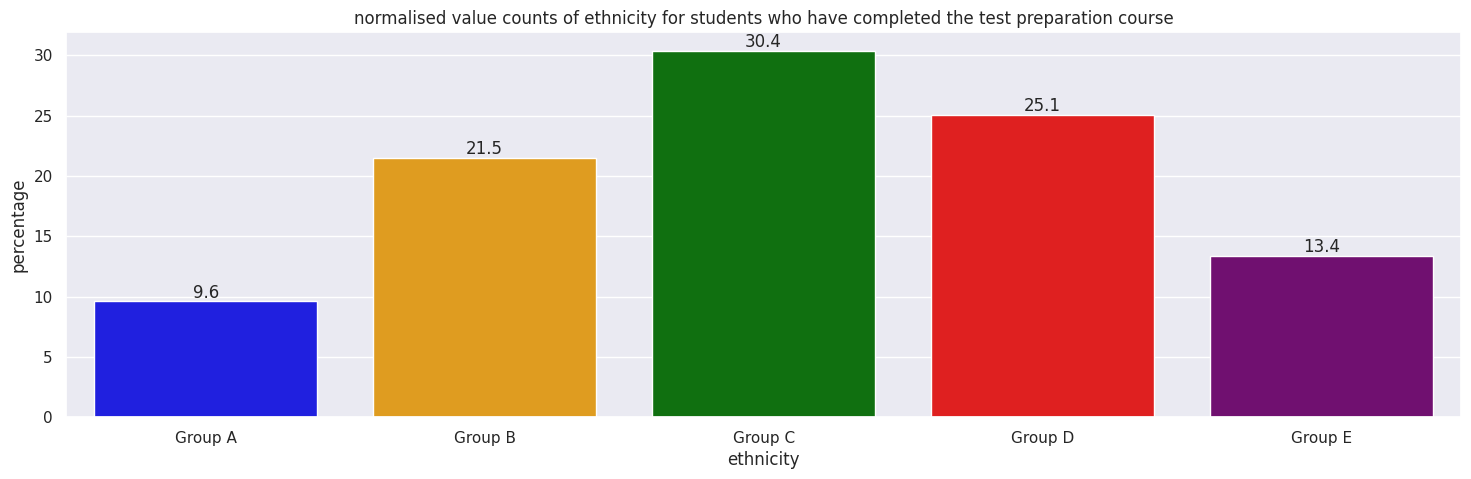

In [98]:
! rm outputs/plots/ethnicity-test-prep-course/ethnicity-test-prep-course-comp.png

fig_eth_tpc_comp_percent = sns.barplot(x = df_eth_tpc_comp_vc['ethnicity'], y = df_eth_tpc_comp_vc['percentage'])
plt.bar_label(fig_eth_tpc_comp_percent.containers[0])
plt.title('normalised value counts of ethnicity for students who have completed the test preparation course')
plt.savefig(f'{filepath_eth_tpc}/ethnicity-test-prep-course-comp.png')

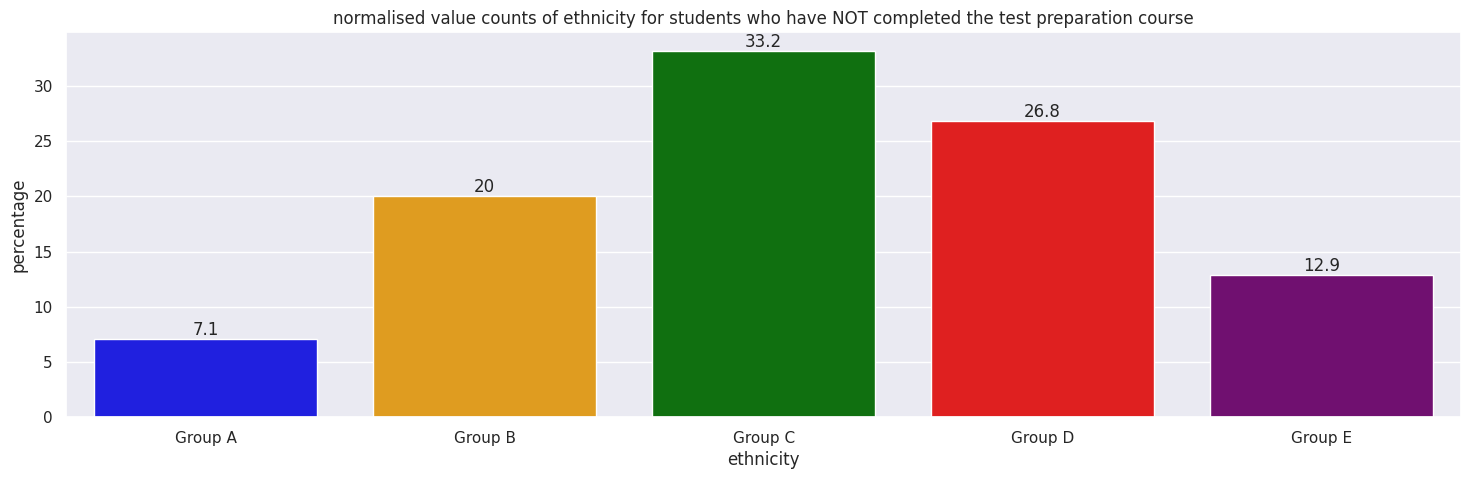

In [99]:
! rm outputs/plots/ethnicity-test-prep-course/ethnicity-test-prep-course-none.png

fig_eth_tpc_not_percent = sns.barplot(x = df_eth_tpc_not_vc['ethnicity'], y = df_eth_tpc_not_vc['percentage'])
plt.bar_label(fig_eth_tpc_not_percent.containers[0])
plt.title('normalised value counts of ethnicity for students who have NOT completed the test preparation course')
plt.savefig(f'{filepath_eth_tpc}/ethnicity-test-prep-course-none.png')

### Hypothesis 11 - gender - test preparation course

We can now save the plots that show that there is no discernable link between a student's gender and their participation in the test preparation course.

In [100]:
try:
  os.makedirs(name='outputs/plots/gender-test-prep-course') # create outputs/plots/gender-test-prep-course folder
except Exception as e:
  print(e)

filepath_gen_tpc = 'outputs/plots/gender-test-prep-course'

[Errno 17] File exists: 'outputs/plots/gender-test-prep-course'


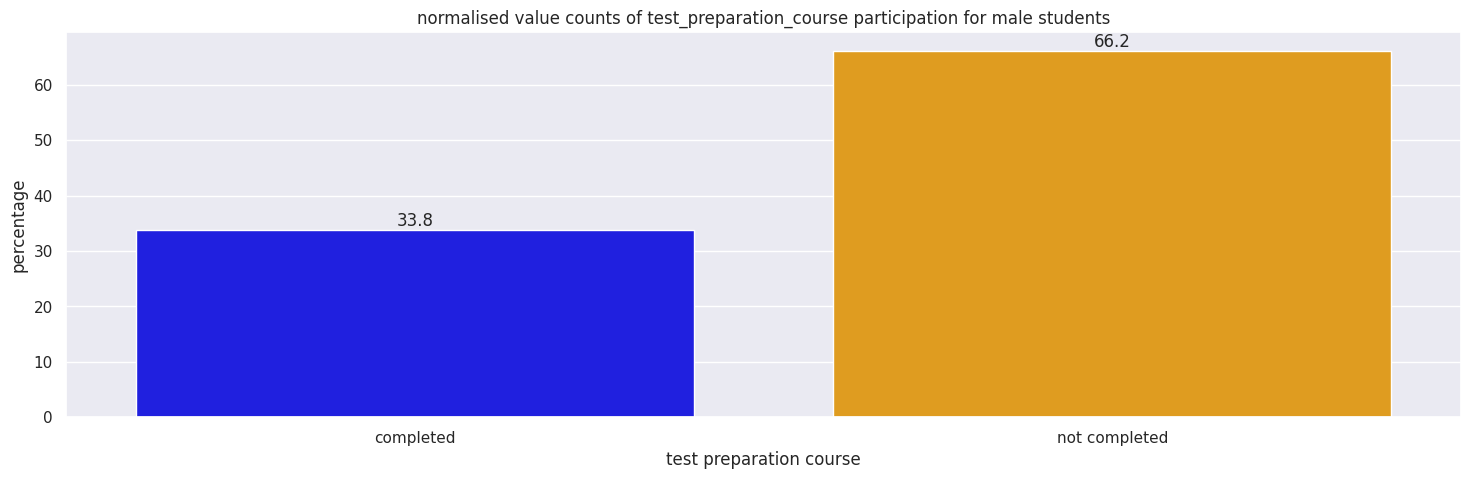

In [101]:
! rm outputs/plots/gender-test-prep-course/gender-test-prep-course-comp.png

fig_gen_tpc_comp_percent = sns.barplot(x = df_gen_tpc_comp_vc['test preparation course'], y = df_gen_tpc_comp_vc['percentage'])
plt.bar_label(fig_gen_tpc_comp_percent.containers[0])
plt.title('normalised value counts of test_preparation_course participation for male students')
plt.savefig(f'{filepath_gen_tpc}/gender-test-prep-course-comp.png')

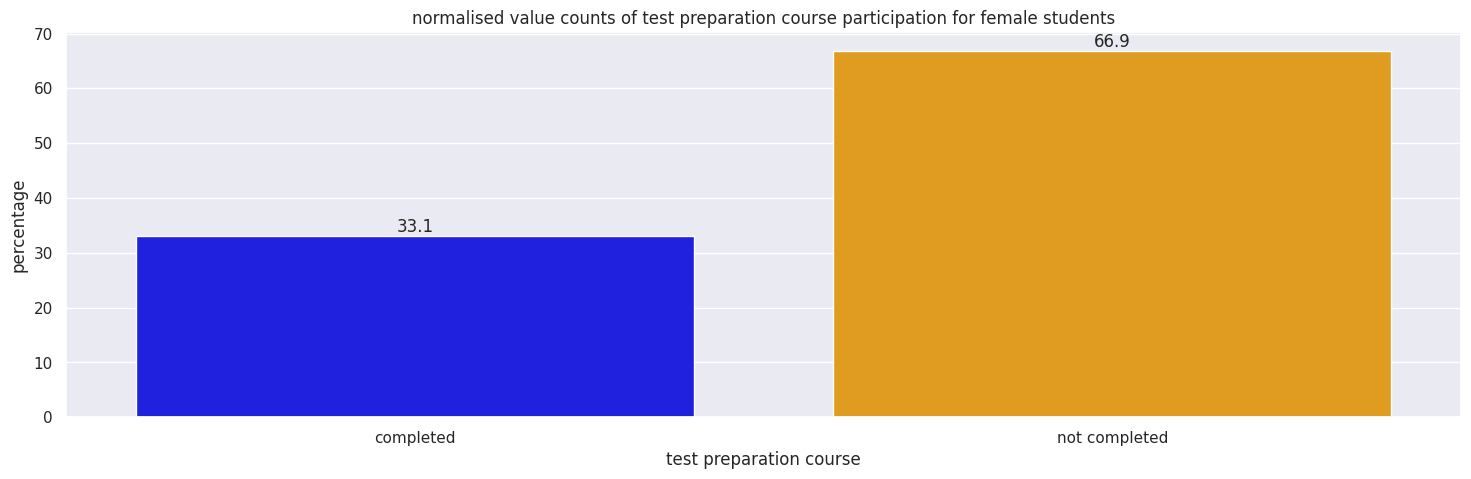

In [102]:
! rm outputs/plots/gender-test-prep-course/gender-test-prep-course-none.png

fig_gen_tpc_not_percent = sns.barplot(x = df_gen_tpc_not_vc['test preparation course'], y = df_gen_tpc_not_vc['percentage'])
plt.bar_label(fig_gen_tpc_not_percent.containers[0])
plt.title('normalised value counts of test preparation course participation for female students')
plt.savefig(f'{filepath_gen_tpc}/gender-test-prep-course-none.png')